<a href="https://colab.research.google.com/github/ru2zi/Dishwashers_Anomaly_Detection/blob/main/CODE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
import numpy as np
from pylab import rcParams

from scipy.signal import find_peaks
import tensorflow as tf
from keras import optimizers, Sequential
from keras.models import Model
from keras.utils import plot_model
from keras.layers import Input, Dropout, Dense, LSTM, TimeDistributed, RepeatVector
from keras.callbacks import ModelCheckpoint, TensorBoard

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix, precision_recall_curve
from sklearn.metrics import recall_score, classification_report, auc, roc_curve
from sklearn.metrics import precision_recall_fscore_support, f1_score


import plotly.express as px
import plotly.graph_objects as go

from numpy.random import seed
#seed(7)

from sklearn.model_selection import train_test_split

#SEED = 2023

from fastdtw import fastdtw

In [ ]:
# 그래프 배경을 하얀색으로 설정
plt.style.use('default')
plt.rcParams['axes.facecolor'] = 'white'

In [ ]:
import tensorflow as tf

print("tf.test.is_built_with_cuda():", tf.test.is_built_with_cuda())

print("tf.test.is_gpu_available():", tf.test.is_gpu_available())

# Undocumented feature

from tensorflow.python.client import device_lib as _device_lib

print(_device_lib.list_local_devices())

In [ ]:
avg_04_01_04_08 = pd.read_excel("C:/Users/Admin/Downloads\Etri/삼천산업 데이터 모음/1차 데이터/1C진동융착기_설비전력_DATA_현황_20230503114027.xlsx")
avg_04_10_04_15 = pd.read_excel("C:/Users/Admin/Downloads/Etri/삼천산업 데이터 모음/1차 데이터/2C진동융착기_설비전력_DATA_현황_20230503114438.xlsx")
avg_04_17_04_22 = pd.read_excel("C:/Users/Admin/Downloads/Etri/삼천산업 데이터 모음/1차 데이터/3C진동융착기_설비전력_DATA_현황_20230503115609.xlsx")
avg_04_24_05_02 = pd.read_excel("C:/Users/Admin/Downloads/Etri/삼천산업 데이터 모음/1차 데이터/4C진동융착기_설비전력_DATA_현황_20230503115838.xlsx")
avg_05_17 = pd.read_excel("C:/Users/Admin/Downloads/Etri/삼천산업 데이터 모음/2차 데이터/XD Nozzle 전력분석/23.05.17진동융착기_설비전력_DATA_현황(3상 평균전류).xlsx")
avg_05_18 = pd.read_excel("C:/Users/Admin/Downloads/Etri/삼천산업 데이터 모음/2차 데이터/XD Nozzle 전력분석/23.05.18진동융착기_설비전력_DATA_현황(3상 평균전류).xlsx")
avg_05_19 = pd.read_excel("C:/Users/Admin/Downloads/Etri/삼천산업 데이터 모음/2차 데이터/XD Nozzle 전력분석/23.05.19진동융착기_설비전력_DATA_현황(3상 평균전류).xlsx")
avg_05_25 = pd.read_excel("C:/Users/Admin/Downloads/Etri/삼천산업 데이터 모음/3차 데이터/23.05.25C진동융착기_설비전력_DATA_현황_20230605144944(3상 평균전류).xlsx")
avg_05_26 = pd.read_excel("C:/Users/Admin/Downloads/Etri/삼천산업 데이터 모음/3차 데이터/23.05.26C진동융착기_설비전력_DATA_현황_20230605145427(3상 평균전류).xlsx")
avg_05_27 = pd.read_excel("C:/Users/Admin/Downloads/Etri/삼천산업 데이터 모음/3차 데이터/23.05.27C진동융착기_설비전력_DATA_현황_20230605145944(3상 평균전류).xlsx")
avg_05_29 = pd.read_excel("C:/Users/Admin/Downloads/Etri/삼천산업 데이터 모음/3차 데이터/23.05.29C진동융착기_설비전력_DATA_현황_20230605151922(3상 평균전류).xlsx")
avg_05_30 = pd.read_excel("C:/Users/Admin/Downloads/Etri/삼천산업 데이터 모음/3차 데이터/23.05.30C진동융착기_설비전력_DATA_현황_20230605152304(3상 평균전류).xlsx")
avg_05_31 = pd.read_excel("C:/Users/Admin/Downloads/Etri/삼천산업 데이터 모음/3차 데이터/23.05.31C진동융착기_설비전력_DATA_현황_20230605152756(3상 평균전류).xlsx")
avg_06_01 = pd.read_excel("C:/Users/Admin/Downloads/Etri/삼천산업 데이터 모음/3차 데이터/23.06.01C진동융착기_설비전력_DATA_현황_20230605153212(3상 평균전류).xlsx")
avg_06_02 = pd.read_excel("C:/Users/Admin/Downloads/Etri/삼천산업 데이터 모음/3차 데이터/23.06.02C진동융착기_설비전력_DATA_현황_20230605153656(3상 평균전류).xlsx")
avg_06_03 = pd.read_excel("C:/Users/Admin/Downloads/Etri/삼천산업 데이터 모음/3차 데이터/23.06.03C진동융착기_설비전력_DATA_현황_20230605154131(3상 평균전류).xlsx")
poor_weld = pd.read_excel("C:/Users/Admin/Downloads/Etri/삼천산업 데이터 모음/1차 데이터/23.05.02_XD Nozzle 융착 불량 정리.xlsx")
time_model_2= pd.read_excel("C:/Users/Admin/Downloads/Etri/삼천산업 데이터 모음/2차 데이터\XD Nozzle 전력분석/XD Nozzle 용착 모델별 생산 시간.xlsx")
time_model_3= pd.read_excel("C:/Users/Admin/Downloads/Etri/삼천산업 데이터 모음/3차 데이터/3회차 XD Nozzle 용착 모델별 생산 시간.xlsx")
weld_strength = pd.read_excel("C:/Users/Admin/Downloads/Etri/삼천산업 데이터 모음/3차 데이터/3회차 XD Nozzle 용착 시간별 용착강도 측정 Data.xlsx")

avg_08_07 = pd.read_excel("C:/Users/Admin/Downloads/Etri/Dishwashers_Anomaly_Detection/3상 평균 전류.xlsx")

## 함수 선언

In [ ]:
# Category열 내용 생성
def change_category_by_time_range(Current_Strength_data, time_ranges):
    Current_Strength_data['Category'] = np.nan

    for start_time, end_time, category in time_ranges:
        start_time = pd.to_datetime(start_time)
        end_time = pd.to_datetime(end_time)
        mask = (Current_Strength_data['날짜'] >= start_time) & (Current_Strength_data['날짜'] <= end_time)
        Current_Strength_data.loc[mask, 'Category'] = category

    return Current_Strength_data

# start_time, end_time 사이에 있는 행 추출 후 column_name값 가져옴
def extract_data_between_time(data, start_time, end_time, column_name):
    start_time = pd.to_datetime(start_time)
    end_time = pd.to_datetime(end_time)
    between_time_data = data[(data.index < end_time) & (data.index >= start_time)]
    between_time_data = between_time_data[[column_name]]
    between_time_data = np.array(between_time_data)
    return between_time_data

# 용창강도열 부분에 값이 존재하는 경우 가져오고 Category값이 US인지 EU인지에 따라 분류
def filter_rows_with_values(data_table, category):
    columns_to_check = ['용착강도(좌)_1', '용착강도(좌)_2', '용착강도(좌)_3', '용착강도(좌)_4', '용착강도(좌)_5',
                        '용착강도(좌)_6', '용착강도(좌)_7', '용착강도(좌)_8', '용착강도(우)_1', '용착강도(우)_2',
                        '용착강도(우)_3', '용착강도(우)_4', '용착강도(우)_5', '용착강도(우)_6', '용착강도(우)_7',
                        '용착강도(우)_8']

    rows_with_values = []

    for index, row in data_table.iterrows():
        if not row[columns_to_check].isnull().all():
            rows_with_values.append(row)

    filtered_data = pd.DataFrame(rows_with_values)

    filtered_data_us = filtered_data[filtered_data['Category'] == 'US']
    filtered_data_eu = filtered_data[filtered_data['Category'] == 'EU']

    if category == 'US':
        return filtered_data_us
    elif category == 'EU':
        return filtered_data_eu
    else:
        return filtered_data

# 해당일, 해당 category에 대해 값을 array 형태로 반환: array([4.30586, 4.31395, 4.39656, ..., 4.90187, 4.63368, 4.53176])
def filter_data_by_date_and_category(data, date, column_name, category):
    date_data = data[data['날짜'].dt.date == pd.to_datetime(date).date()]
    filtered_data = date_data[date_data['Category'] == category][column_name]
    filtered_data = np.array(filtered_data)
    filtered_data = filtered_data.flatten()
    return filtered_data

# Peak 데이터 다룰 때 상위 ~% 부분 출력
def select_data_based_on_threshold(data, all_data, peaks, properties, column_name, percentile, peak_type):
    threshold = np.percentile(properties[column_name], percentile)
    selected_rows = data[peaks[properties[column_name] >= threshold]]
    selected_rows_prop = all_data[all_data['VALUE'].isin(selected_rows)]
    selected_rows_prop = selected_rows_prop[['날짜', 'VALUE']]
    selected_rows_prop['Peak'] = peak_type
    return selected_rows_prop

# 뽑아낸 각각의 prop에서 중복되는 행만 추출 후 결합
def combine_selected_data(array_data, whole_data, peaks, properties, percent):
    prominences = select_data_based_on_threshold(array_data, whole_data, peaks, properties, "prominences", percent, "prominences")
    width_heights = select_data_based_on_threshold(array_data, whole_data, peaks, properties, "width_heights", percent, "width_heights")
    widths = select_data_based_on_threshold(array_data, whole_data, peaks, properties, "widths", percent, "widths")
    heights = select_data_based_on_threshold(array_data, whole_data, peaks, properties, "peak_heights", percent, "heights")

    combined = pd.concat([heights, width_heights, prominences, widths])
    return combined


# Peak 지점 기준으로 앞,뒤 지점의 index 구함
def each_visualize_comparison(data, index_num, cycle_duration):
    start_index = max(index_num - cycle_duration, 0)
    end_index = min(index_num + cycle_duration, len(data))
    selected_data = data.iloc[start_index:end_index].copy()

    # 날짜 열 값 가져오기
    date_value = data.loc[index_num, '날짜']

    plt.figure(figsize=(30, 8))
    plt.plot(selected_data.index, selected_data['VALUE'])
    plt.axvline(index_num, color='red', linestyle='--', linewidth=1)
    plt.xlabel('Index')
    plt.ylabel('VALUE')
    plt.title(date_value)
    plt.show()

    return start_index, end_index



# dtw 그래프 그리기
def plot_dtw_comparison(data, graph_indices, title):
    selected_graphs = []
    graph_labels = []
    dtw_distances = []

    for start_index, end_index in graph_indices:
        graph = data.iloc[start_index:end_index]['VALUE'].values
        selected_graphs.append(graph)
        start_time = data.iloc[start_index]['날짜'].strftime('%H:%M:%S')
        end_time = data.iloc[end_index-1]['날짜'].strftime('%H:%M:%S')
        graph_labels.append(f'{start_time}-{end_time}')

    for i in range(len(selected_graphs)):
        for j in range(i+1, len(selected_graphs)):
            graph_i = selected_graphs[i]
            graph_j = selected_graphs[j]
            distance, _ = fastdtw(graph_i, graph_j)
            dtw_distances.append((i, j, distance))

    dtw_distances.sort(key=lambda x: x[2])  # 거리를 기준으로 정렬

    fig, ax = plt.subplots(figsize=(15, 6))
    for i, j, distance in dtw_distances:
        graph_i = selected_graphs[i]
        graph_j = selected_graphs[j]
        label_i = graph_labels[i]
        label_j = graph_labels[j]
        if label_i not in ax.get_legend_handles_labels()[1]:
            ax.plot(graph_i, label=label_i)
        if label_j not in ax.get_legend_handles_labels()[1]:
            ax.plot(graph_j, label=label_j)
        print(f'DTW Distance between {label_i} and {label_j}: {distance}')

    average_distance = sum(distance for _, _, distance in dtw_distances) / len(dtw_distances)
    print("Average DTW Distance:", average_distance)

    plt.xlabel('Index')
    plt.ylabel('VALUE')
    plt.title(title)
    plt.legend()
    plt.show()


def cohen_d(group1, group2):
    # 두 그룹의 평균 차이
    diff = np.mean(group1) - np.mean(group2)

    # 풀 표준 편차 계산
    n1, n2 = len(group1), len(group2)
    var1, var2 = np.var(group1, ddof=1), np.var(group2, ddof=1)
    pooled_var = ((n1 - 1) * var1 + (n2 - 1) * var2) / (n1 + n2 - 2)
    pooled_std = np.sqrt(pooled_var)

    # Cohen's d 계산
    d = diff / pooled_std
    return d



## 전처리

In [ ]:
# poor_weld
poor_weld.drop(['Unnamed: 0'], axis = 1, inplace = True)
poor_weld_column_names = list(poor_weld.iloc[0])
poor_weld = poor_weld[1:]
poor_weld.columns = poor_weld_column_names

# 데이터프레임 전치
poor_weld_trans = poor_weld.transpose()

poor_weld_trans.columns = poor_weld_trans.iloc[0]
poor_weld_trans = poor_weld_trans.iloc[1:-1]
# 불량수량과 생산수량이 모두 0이 아닌 경우에만 불량비율 계산
mask = (poor_weld_trans['불량수량'] != 0) & (poor_weld_trans['생산수량'] != 0)
poor_weld_trans.loc[mask, '불량비율'] = poor_weld_trans.loc[mask, '불량수량'] / poor_weld_trans.loc[mask, '생산수량']

# 불량수량이 0인 경우 불량비율을 0으로 설정
poor_weld_trans.loc[poor_weld_trans['불량수량'] == 0, '불량비율'] = 0
poor_weld_trans.index = pd.to_datetime(poor_weld_trans.index, format='%Y-%m-%d')

poor_weld_trans.reset_index(inplace=True)
poor_weld_trans.rename(columns={'index': '일자'}, inplace=True)

# time_model
time_model_2.drop(['Unnamed: 0'], axis = 1, inplace = True)
time_model_2_column_names = list(time_model_2.iloc[0])
time_model_2 = time_model_2[1:]
time_model_2.columns = time_model_2_column_names

time_model_3.drop(['Unnamed: 0'], axis = 1, inplace = True)
time_model_3_column_names = list(time_model_3.iloc[0])
time_model_3 = time_model_3[1:]
time_model_3.columns = time_model_3_column_names

# weld_strength
weld_strength.drop(['Unnamed: 0'], axis = 1, inplace = True)
weld_strength.columns = weld_strength.iloc[0]
weld_strength = weld_strength[1:].reset_index(drop=True)

new_columns = []
for column in weld_strength.columns:
    if column == '용착강도(좌)':
        new_columns.extend([f'용착강도(좌)_{i}' for i in range(1, 9)])
    elif column == '용착강도(우)':
        new_columns.extend([f'용착강도(우)_{i}' for i in range(1, 9)])
    elif pd.notnull(column):
        new_columns.append(column)

weld_strength.columns = new_columns
weld_strength = weld_strength.iloc[1:]

# '용착강도(좌)'와 '용착강도(우)'를 포함하는 행 제거
weld_strength = weld_strength[~weld_strength.isin(['용착강도(좌)', '용착강도(우)']).any(axis=1)]
weld_strength = weld_strength.dropna(subset=['일자', '시간', '수거시간', 'EU,US'], how='all')
weld_strength = weld_strength.fillna(method='ffill')
weld_strength = weld_strength.reset_index(drop=True)

# Replace 'X' with NaN
weld_strength.replace('X', np.nan, inplace=True)

weld_strength_filtered = weld_strength.dropna(subset=['수거시간', 'EU,US', '용착강도(좌)_1', '용착강도(좌)_2', '용착강도(좌)_3', '용착강도(좌)_4', '용착강도(좌)_5', '용착강도(좌)_6', '용착강도(좌)_7', '용착강도(좌)_8',
                                                       '용착강도(우)_1', '용착강도(우)_2', '용착강도(우)_3', '용착강도(우)_4', '용착강도(우)_5', '용착강도(우)_6', '용착강도(우)_7', '용착강도(우)_8'], how='all')
weld_strength_filtered = weld_strength_filtered.reset_index(drop=True)

# Concatenate '일자' and '수거시간' columns
combined_datetime = weld_strength_filtered['일자'].astype(str) + ' ' + weld_strength_filtered['수거시간'].astype(str)
weld_strength_filtered['날짜'] = pd.to_datetime(combined_datetime, format='%Y-%m-%d %H:%M:%S')


# 전류 데이터 전처리
def Clean(df):
    df = df.drop(df.columns[0], axis=1)
    new_column_name = df.iloc[2, :]
    new_column_name = new_column_name.reset_index(drop=True)
    df.columns = new_column_name
    df = df.iloc[3:]
    df = df.drop("TAG DESC", axis=1)
    df['날짜'] = pd.to_datetime(df['날짜'])
    df['VALUE'] = pd.to_numeric(df['VALUE'])  # VALUE 열의 데이터 타입을 숫자로 변환
    df = df.reset_index(drop=True)

    return df

In [ ]:
avg_04_01_04_08 = Clean(avg_04_01_04_08)
avg_04_10_04_15 = Clean(avg_04_10_04_15)
avg_04_17_04_22 = Clean(avg_04_17_04_22)
avg_04_24_05_02 = Clean(avg_04_24_05_02)
avg_05_17 = Clean(avg_05_17)
avg_05_18 = Clean(avg_05_18)
avg_05_19 = Clean(avg_05_19)
avg_05_25 = Clean(avg_05_25)
avg_05_26 = Clean(avg_05_26)
avg_05_27 = Clean(avg_05_27)
avg_05_29 = Clean(avg_05_29)
avg_05_30 = Clean(avg_05_30)
avg_05_31 = Clean(avg_05_31)
avg_06_01 = Clean(avg_06_01)
avg_06_02 = Clean(avg_06_02)
avg_06_03 = Clean(avg_06_03)

avg_4 = pd.concat([avg_04_01_04_08, avg_04_10_04_15, avg_04_17_04_22, avg_04_24_05_02])
avg_4 = avg_4.reset_index(drop=True)
avg_5_6 = pd.concat([avg_05_17, avg_05_18, avg_05_19, avg_05_25, avg_05_26, avg_05_27, avg_05_29, avg_05_30, avg_05_31, avg_06_01, avg_06_02, avg_06_03 ])
avg_5_6 = avg_5_6.reset_index(drop=True)
avg_all = pd.concat([avg_4,avg_5_6])
avg_all = avg_all.reset_index(drop=True)



avg_08_07 = Clean(avg_08_07)

In [ ]:
Current_Strength_data = weld_strength_filtered.merge(avg_all, on='날짜', how='right')
Current_Strength_data = poor_weld_trans.merge(Current_Strength_data, on='일자', how='right')

cols = ['날짜', 'VALUE'] + [col for col in Current_Strength_data.columns if col not in ['날짜', 'VALUE']]
Current_Strength_data = Current_Strength_data[cols]

In [ ]:
# '용착강도(좌)_1'부터 '용착강도(우)_8'까지 열 선택
columns = ['용착강도(좌)_1', '용착강도(좌)_2', '용착강도(좌)_3', '용착강도(좌)_4', '용착강도(좌)_5',
           '용착강도(좌)_6', '용착강도(좌)_7', '용착강도(좌)_8', '용착강도(우)_1', '용착강도(우)_2',
           '용착강도(우)_3', '용착강도(우)_4', '용착강도(우)_5', '용착강도(우)_6', '용착강도(우)_7',
           '용착강도(우)_8']

# Extract the weld strength columns for different sections
weld_strength_left = Current_Strength_data[['용착강도(좌)_1', '용착강도(좌)_2', '용착강도(좌)_3', '용착강도(좌)_4', '용착강도(좌)_5', '용착강도(좌)_6','용착강도(좌)_7', '용착강도(좌)_8']]
weld_strength_right = Current_Strength_data[['용착강도(우)_1', '용착강도(우)_2', '용착강도(우)_3', '용착강도(우)_4', '용착강도(우)_5', '용착강도(우)_6','용착강도(우)_7', '용착강도(우)_8']]


Current_Strength_data['Min_Max_diff'] =  Current_Strength_data[columns].max(axis=1) -  Current_Strength_data[columns].min(axis=1)
Current_Strength_data['weld_strength_left_mean'] = weld_strength_left.mean(axis=1)
Current_Strength_data['weld_strength_right_mean'] = weld_strength_right.mean(axis=1)
Current_Strength_data['VALUE_DIFF'] = Current_Strength_data['VALUE'].diff().fillna(0)


time_ranges = [('2023-05-17 08:00:00', '2023-05-17 10:59:59', 'EU'),
               ('2023-05-17 11:00:00', '2023-05-17 22:59:59', 'US'),
               ('2023-05-17 23:00:00', '2023-05-17 23:59:59', 'EU'),
               ('2023-05-18 01:00:00', '2023-05-18 06:59:59', 'EU'),
               ('2023-05-18 08:00:00', '2023-05-18 23:29:59', 'US'),
               ('2023-05-18 23:30:00', '2023-05-19 05:29:59', 'EU'),
               ('2023-05-19 05:30:00', '2023-05-19 09:29:59', 'US'),
               ('2023-05-19 20:00:00', '2023-05-20 00:29:59', 'US'),
               ('2023-05-20 00:30:00', '2023-05-20 06:59:59', 'EU'),
               ('2023-05-25 08:00:00', '2023-05-25 10:59:59', 'US'),
               ('2023-05-25 11:00:00', '2023-05-25 13:59:59', 'EU'),
               ('2023-05-25 15:00:00', '2023-05-25 16:59:59', 'EU'),
               ('2023-05-25 17:00:00', '2023-05-25 18:59:59', 'US'),
               ('2023-05-25 22:00:00', '2023-05-25 23:59:59', 'US'),
               ('2023-05-26 01:00:00', '2023-05-26 05:59:59', 'EU'),
               ('2023-05-26 08:00:00', '2023-05-26 14:59:59', 'EU'),
               ('2023-05-26 15:00:00', '2023-05-26 23:59:59', 'US'),
               ('2023-05-27 01:00:00', '2023-05-27 06:59:59', 'US'),
               ('2023-05-29 08:00:00', '2023-05-29 10:29:59', 'US'),
               ('2023-05-29 10:30:00', '2023-05-29 22:59:59', 'EU'),
               ('2023-05-30 03:00:00', '2023-05-30 06:59:59', 'US'),
               ('2023-05-30 08:00:00', '2023-05-30 15:59:59', 'EU'),
               ('2023-05-30 16:00:00', '2023-05-30 23:59:59', 'US'),
               ('2023-05-31 01:00:00', '2023-05-31 06:59:59', 'US'),
               ('2023-05-31 08:00:00', '2023-05-31 16:59:59', 'EU'),
               ('2023-05-31 20:00:00', '2023-05-31 21:59:59', 'US'),
               ('2023-06-01 05:00:00', '2023-06-01 15:59:59', 'US'),
               ('2023-06-01 16:00:00', '2023-06-01 21:59:59', 'EU'),
               ('2023-06-01 22:00:00', '2023-06-01 23:59:59', 'US'),
               ('2023-06-02 01:00:00', '2023-06-02 04:59:59', 'US'),
               ('2023-06-02 11:00:00', '2023-06-02 23:59:59', 'US'),
               ('2023-06-03 01:00:00', '2023-06-03 01:59:59', 'US'),
               ('2023-06-03 02:00:00', '2023-06-03 06:59:59', 'EU')]

Current_Strength_US_EU_data = change_category_by_time_range(Current_Strength_data, time_ranges)

Current_Strength_US_EU_data['strength_mean'] = Current_Strength_US_EU_data[['용착강도(좌)_1', '용착강도(좌)_2', '용착강도(좌)_3', '용착강도(좌)_4', '용착강도(좌)_5',
                        '용착강도(좌)_6', '용착강도(좌)_7', '용착강도(좌)_8', '용착강도(우)_1', '용착강도(우)_2',
                        '용착강도(우)_3', '용착강도(우)_4', '용착강도(우)_5', '용착강도(우)_6', '용착강도(우)_7',
                        '용착강도(우)_8']].mean(axis=1)

In [ ]:
Current_Strength_US_EU_data

## 시각화

#### 용착강도 값 분포

In [ ]:
merged_data = Current_Strength_US_EU_data[Current_Strength_US_EU_data['날짜'].isin(weld_strength_filtered['날짜'])]

In [ ]:
# 수치 값들을 저장할 리스트
all_value = []

# 열들을 순회하면서 수치 값들을 가져와 리스트에 추가
for i in ['용착강도(좌)_1', '용착강도(좌)_2', '용착강도(좌)_3', '용착강도(좌)_4', '용착강도(좌)_5',
            '용착강도(좌)_6', '용착강도(좌)_7', '용착강도(좌)_8', '용착강도(우)_1', '용착강도(우)_2',
            '용착강도(우)_3', '용착강도(우)_4', '용착강도(우)_5', '용착강도(우)_6', '용착강도(우)_7',
            '용착강도(우)_8']:
    value = weld_strength_filtered[i].values
    all_value.extend(value)

# 수치 값들의 개수를 세기
value_count = pd.Series(all_value).value_counts()

# 시각화
plt.bar(value_count.index, value_count.values)
plt.xlabel('strengths')
plt.ylabel('count')
plt.title('Strengths_distribution')
# 눈금 간격 1로 변경(x, y축 모두)
plt.xticks(range(30))
plt.yticks(range(10))
plt.grid()
plt.xticks(rotation=90)
plt.show()


In [ ]:
# 실제 match 된 것
for_plot = merged_data.reset_index(drop=True)

In [ ]:
# 수치 값들을 저장할 리스트
all_values = []

# 열들을 순회하면서 수치 값들을 가져와 리스트에 추가
for col in ['용착강도(좌)_1', '용착강도(좌)_2', '용착강도(좌)_3', '용착강도(좌)_4', '용착강도(좌)_5',
            '용착강도(좌)_6', '용착강도(좌)_7', '용착강도(좌)_8', '용착강도(우)_1', '용착강도(우)_2',
            '용착강도(우)_3', '용착강도(우)_4', '용착강도(우)_5', '용착강도(우)_6', '용착강도(우)_7',
            '용착강도(우)_8']:
    values = for_plot [col].values
    all_values.extend(values)

# 수치 값들의 개수를 세기
value_counts = pd.Series(all_values).value_counts()

# 시각화
plt.bar(value_counts.index, value_counts.values)
plt.xlabel('strengths')
plt.ylabel('count')
plt.title('Strengths_distribution')
# 눈금 간격 1로 변경(x, y축 모두)
plt.xticks(range(30))
plt.yticks(range(10))
plt.grid()
plt.xticks(rotation=90)
plt.show()

#### 제품 원산지에 따른 비교

In [ ]:
import seaborn as sns

sns.boxplot(x='Category', y='VALUE', data=Current_Strength_US_EU_data)
plt.xlabel('Category')
plt.ylabel('VALUE')
plt.title('Change in VALUE by Category')
plt.show()

#### Value 분포

In [ ]:
plt.figure(figsize=(50,8))
plt.plot(Current_Strength_US_EU_data['날짜'], Current_Strength_US_EU_data['VALUE'])
plt.xlabel('Date')
plt.ylabel('VALUE')
plt.title('Trend of VALUE')
plt.xticks(rotation=45)
plt.show()

## Peak 분석

In [ ]:
# prominences: 각 피크의 prominence(눈에 띄는 정도)를 나타내는 1차원 배열
# width_heights: 각 피크의 너비에 해당하는 높이를 나타내는 1차원 배열
# widths: 각 피크의 너비를 나타내는 1차원 배열
# peak_heights: 각 피크의 높이를 나타내는 1차원 배열

### 용착 강도가 존재하는 부분에 대해 5월 26일(EU) Peak 분석

In [ ]:
# 사용 X
# EU 제품
between_8_43_30_EU_data = extract_data_between_time(data, '2023-05-26 8:40:00', '2023-05-26 8:50:00', 'VALUE')
between_9_11_34_EU_data = extract_data_between_time(data, '2023-05-26 9:10:00', '2023-05-26 9:20:00', 'VALUE')
between_10_18_07_EU_data = extract_data_between_time(data, '2023-05-26 10:10:00', '2023-05-26 10:20:00', 'VALUE')
between_11_04_09_EU_data = extract_data_between_time(data, '2023-05-26 11:00:00', '2023-05-26 11:10:00', 'VALUE')
between_13_11_42_EU_data = extract_data_between_time(data, '2023-05-26 13:10:00', '2023-05-26 13:20:00', 'VALUE')
between_14_08_09_EU_data = extract_data_between_time(data, '2023-05-26 14:00:00', '2023-05-26 14:10:00', 'VALUE')

# US 제품
between_15_24_55_US_data = extract_data_between_time(data, '2023-05-26 15:20:00', '2023-05-26 15:30:00', 'VALUE')
between_15_55_21_US_data = extract_data_between_time(data, '2023-05-26 15:50:00', '2023-05-26 16:00:00', 'VALUE')
between_16_08_32_US_data = extract_data_between_time(data, '2023-05-26 16:00:00', '2023-05-26 16:10:00', 'VALUE')

### 사용 O
Data_05_26 = Current_Strength_US_EU_data[Current_Strength_US_EU_data['날짜'].dt.date == pd.to_datetime('2023-05-26').date()]

filtered_data_05_26_us = filter_rows_with_values(Data_05_26, 'US')
filtered_data_05_26_eu = filter_rows_with_values(Data_05_26, 'EU')

data_05_26_us = filtered_data_05_26_us[['날짜','VALUE','용착강도(좌)_1', '용착강도(좌)_2', '용착강도(좌)_3', '용착강도(좌)_4', '용착강도(좌)_5',
                        '용착강도(좌)_6', '용착강도(좌)_7', '용착강도(좌)_8', '용착강도(우)_1', '용착강도(우)_2',
                        '용착강도(우)_3', '용착강도(우)_4', '용착강도(우)_5', '용착강도(우)_6', '용착강도(우)_7',
                        '용착강도(우)_8']]
data_05_26_eu = filtered_data_05_26_eu[['날짜','VALUE','용착강도(좌)_1', '용착강도(좌)_2', '용착강도(좌)_3', '용착강도(좌)_4', '용착강도(좌)_5',
                        '용착강도(좌)_6', '용착강도(좌)_7', '용착강도(좌)_8', '용착강도(우)_1', '용착강도(우)_2',
                        '용착강도(우)_3', '용착강도(우)_4', '용착강도(우)_5', '용착강도(우)_6', '용착강도(우)_7',
                        '용착강도(우)_8']]

In [ ]:
# 26일에 용착 강도가 존재하는 부분에 대해서만 10분 간격으로 Peak 데이터 시각화
time_ranges = [('8_43_30', '8:40:00', '8:50:00'),
               ('9_11_34', '9:10:00', '9:20:00'),
               ('10_18_07', '10:10:00', '10:20:00'),
               ('11_04_09', '11:00:00', '11:10:00'),
               ('13_11_42', '13:10:00', '13:20:00'),
               ('14_08_09', '14:00:00', '14:10:00')]

peaks_data = []
properties_data = []
value_data = []

for data_name, start_time, end_time in time_ranges:
    between_time_data = extract_data_between_time(data, f'2023-05-26 {start_time}', f'2023-05-26 {end_time}', 'VALUE')
    between_time_data = between_time_data.flatten()
    peaks, properties = find_peaks(between_time_data, prominence=2, width=2, height=5)

    # Store peaks in individual variables
    exec(f"peaks_{data_name} = peaks")

    # Store properties in individual variables
    exec(f"properties_{data_name} = properties")

    # Store peaks and properties in lists
    peaks_data.append(peaks)
    properties_data.append(properties)

    # Store original VALUE values corresponding to the peaks
    value_data.append(between_time_data[peaks])

    plt.figure(figsize=(50, 10))
    plt.plot(between_time_data)
    plt.plot(peaks, between_time_data[peaks], "x")
    plt.plot(np.zeros_like(between_time_data), "--", color="gray")
    plt.title(f'Peaks at {data_name}')
    plt.show()


### 5월 26일 전체 EU Peaks

In [ ]:
Current_Strength_EU_data = Current_Strength_US_EU_data[(Current_Strength_US_EU_data['날짜'].dt.date == pd.to_datetime('2023-05-26').date()) & (Current_Strength_US_EU_data['Category'] == 'EU')]
All_5_26_EU_data = filter_data_by_date_and_category(Current_Strength_US_EU_data, '2023-05-26', 'VALUE', 'EU')

In [ ]:
# 5월 26일 EU 전력 데이터 시각화
peaks_EU_5_26, properties_EU_5_26 = find_peaks(All_5_26_EU_data, prominence=5,width=2,height=10)
plt.figure(figsize=(50,10))
plt.plot(All_5_26_EU_data)
plt.plot(peaks_EU_5_26, All_5_26_EU_data[peaks_EU_5_26], "x")
#plt.plot(np.zeros_like(between_8_43_30_EU_data), "--", color="gray")
plt.show()

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

axs[0, 0].hist(properties_EU_5_26["prominences"], bins=5, alpha=0.5, label='0526')
axs[0, 0].set_xlabel('prominences number')
axs[0, 0].set_ylabel('count')

axs[0, 1].hist(properties_EU_5_26["width_heights"], alpha=0.5, label='0526')
axs[0, 1].set_xlabel('width_heights number')
axs[0, 1].set_ylabel('count')

axs[1, 0].hist(properties_EU_5_26["widths"], alpha=0.5, label='0526')
axs[1, 0].set_xlabel('widths number')
axs[1, 0].set_ylabel('count')

axs[1, 1].hist(properties_EU_5_26["peak_heights"], alpha=0.5, label='0526')
axs[1, 1].set_xlabel('peak_heights number')
axs[1, 1].set_ylabel('count')

plt.tight_layout()
#fig.legend()
plt.show()


In [ ]:
# 5월 6일 EU기기 데이터 중 "prominences" 값이 상위 90%에 해당하는 숫자고른다.
# prominence 값이 클수록 해당 피크가 주변 신호와 뚜렷하게 구분되는 정도가 높다는 의미이다.
# 숫자 값을 바탕으로 원래 데이터셋의 어느 위치에 해당하는지 추출: 단, 숫자 바탕으로 탐색했기에 추출 숫자 개수보다 많이 출력이 가능하다.

In [ ]:
combined_EU = combine_selected_data(All_5_26_EU_data, Current_Strength_EU_data, peaks_EU_5_26, properties_EU_5_26, 99)
combined_EU_Peak = combined_EU.sort_index()

duplicated_EU_Peak = combined_EU_Peak[combined_EU_Peak.duplicated(subset='날짜', keep=False)]
EU_Peak = duplicated_EU_Peak.drop_duplicates(subset='날짜')

### 5월 26일 전체 US Peak

In [ ]:
Current_Strength_US_data = Current_Strength_US_EU_data[(Current_Strength_US_EU_data['날짜'].dt.date == pd.to_datetime('2023-05-26').date()) & (Current_Strength_US_EU_data['Category'] == 'US')]
All_5_26_US_data = filter_data_by_date_and_category(Current_Strength_US_EU_data, '2023-05-26', 'VALUE', 'US')

In [ ]:
peaks_US_5_26, properties_US_5_26 = find_peaks(All_5_26_US_data, prominence=5,width=2,height=10)
plt.figure(figsize=(50,10))
plt.plot(All_5_26_US_data)
plt.plot(peaks_US_5_26, All_5_26_US_data[peaks_US_5_26], "x")
plt.show()

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

axs[0, 0].hist(properties_US_5_26["prominences"], bins=5, alpha=0.5, label='0526')
axs[0, 0].set_xlabel('prominences number')
axs[0, 0].set_ylabel('count')

axs[0, 1].hist(properties_US_5_26["width_heights"], alpha=0.5, label='0526')
axs[0, 1].set_xlabel('width_heights number')
axs[0, 1].set_ylabel('count')

axs[1, 0].hist(properties_US_5_26["widths"], alpha=0.5, label='0526')
axs[1, 0].set_xlabel('widths number')
axs[1, 0].set_ylabel('count')

axs[1, 1].hist(properties_US_5_26["peak_heights"], alpha=0.5, label='0526')
axs[1, 1].set_xlabel('peak_heights number')
axs[1, 1].set_ylabel('count')

plt.tight_layout()
#fig.legend()
plt.show()


In [ ]:
combined_US = combine_selected_data(All_5_26_US_data, Current_Strength_US_data, peaks_US_5_26, properties_US_5_26, 99)
combined_US_Peak = combined_US.sort_index()

duplicated_US_Peak = combined_US_Peak[combined_US_Peak.duplicated(subset='날짜', keep=False)]
US_Peak = duplicated_US_Peak.drop_duplicates(subset='날짜')

### US,EU Peak 데이터 시각화

In [ ]:
US_graph_indices = []

for index, row in US_Peak.iterrows():
    start_index, end_index = each_visualize_comparison(Current_Strength_US_EU_data, index, 5)
    US_graph_indices.append((start_index, end_index))

In [ ]:
EU_graph_indices = []

for index, row in EU_Peak.iterrows():
    start_index, end_index = each_visualize_comparison(Current_Strength_US_EU_data, index, 5)
    EU_graph_indices.append((start_index, end_index))

In [ ]:
# US 그래프 그리기
plot_dtw_comparison(Current_Strength_US_EU_data, US_graph_indices, 'US DTW Comparison of Selected Graphs')

In [ ]:
# EU 그래프 그리기
plot_dtw_comparison(Current_Strength_US_EU_data, EU_graph_indices, 'EU DTW Comparison of Selected Graphs')

### MIN-MAX 기준 Peak 분석

In [ ]:
dates = ['2023-05-17', '2023-05-18', '2023-05-19','2023-05-22','2023-05-23','2023-05-24',
         '2023-05-25','2023-05-26','2023-05-29','2023-05-30','2023-05-31','2023-06-01','2023-06-02']
selected_dates = pd.to_datetime(dates).date

Data_05_06_strength = Current_Strength_US_EU_data[Current_Strength_US_EU_data['날짜'].dt.date.isin(selected_dates)]

Data_05_06_strength = Data_05_06_strength.set_index('날짜')

filtered_data_strength_us = filter_rows_with_values(Data_05_06_strength , 'US')
filtered_data_strength_eu = filter_rows_with_values(Data_05_06_strength , 'EU')

strength_us = filtered_data_strength_us[['VALUE','Min_Max_diff']]
strength_eu = filtered_data_strength_eu[['VALUE','Min_Max_diff']]

In [ ]:
# US 데이터
num_bins = 5

min_val = strength_us['Min_Max_diff'].min()
max_val = strength_us['Min_Max_diff'].max()

bin_size = (max_val - min_val) / num_bins

strength_us['Min_Max_diff_bin'] = pd.cut(strength_us['Min_Max_diff'], bins=num_bins, labels=False, include_lowest=True)

# 3.898 / 6.986 / 10.074 / 13.162


In [ ]:
plt.figure(figsize=(8, 6))
plt.hist(strength_us['Min_Max_diff_bin'], bins=num_bins, edgecolor='black', alpha=0.5)
plt.xlabel('Min_Max_diff_bin')
plt.ylabel('Count')
plt.title('US Distribution of Min_Max_diff_bin')
plt.xticks(range(num_bins))
plt.show()

In [ ]:
# EU 데이터
num_bins = 5

min_val = strength_eu['Min_Max_diff'].min()
max_val = strength_eu['Min_Max_diff'].max()

bin_size = (max_val - min_val) / num_bins

strength_eu['Min_Max_diff_bin'] = pd.cut(strength_eu['Min_Max_diff'], bins=num_bins, labels=False, include_lowest=True)
# 3.65 / 6.294 / 8.936 / 11.578


In [ ]:
plt.figure(figsize=(8, 6))
plt.hist(strength_eu['Min_Max_diff_bin'], bins=num_bins, edgecolor='black', alpha=0.5)
plt.xlabel('Min_Max_diff_bin')
plt.ylabel('Count')
plt.title('EU Distribution of Min_Max_diff_bin')
plt.xticks(range(num_bins))
plt.show()

In [ ]:
#Current_Strength_US_EU_data.reset_index(drop=True, inplace=True)
Current_Strength_US_EU_index_data = Current_Strength_US_EU_data.set_index('날짜')

In [ ]:

import datetime
from scipy.signal import find_peaks, peak_widths


def extract_data_between_time(data, start_time, end_time, column_name):
    start_time = pd.to_datetime(start_time)
    end_time = pd.to_datetime(end_time)
    between_time_data = data[(data.index < end_time) & (data.index >= start_time)]
    between_time_data = between_time_data[[column_name]]
    between_time_data = np.array(between_time_data)
    return between_time_data

def process_strength(data):
    peaks_data = []
    properties_data = []
    widths_data = []
    width_heights_data = []
    value_data = []

    for date_value in data.index:
        start_time = date_value - datetime.timedelta(seconds=10)
        end_time = date_value + datetime.timedelta(seconds=10)

        between_time_data = extract_data_between_time(Current_Strength_US_EU_index_data, start_time, end_time, 'VALUE')
        between_time_data = between_time_data.flatten()
        peaks, properties = find_peaks(between_time_data, prominence=4, height=5)

        widths, width_heights, left_bases, right_bases = peak_widths(between_time_data, peaks)

        # Store peaks in individual variables
        exec(f"peaks_{str(index).replace('-', '_').replace(' ', '_').replace(':', '_')} = peaks")

        # Store properties in individual variables
        exec(f"properties_{str(index).replace('-', '_').replace(' ', '_').replace(':', '_')} = properties")

        # Store widths and width heights in individual variables
        exec(f"widths_{str(index).replace('-', '_').replace(' ', '_').replace(':', '_')} = widths")
        exec(f"width_heights_{str(index).replace('-', '_').replace(' ', '_').replace(':', '_')} = width_heights")

        # Store peaks and properties in lists
        peaks_data.append(peaks)
        properties_data.append(properties)
        widths_data.append(widths)
        width_heights_data.append(width_heights)

        # Store original Current values corresponding to the peaks
        value_data.append(between_time_data[peaks])

    return peaks_data, properties_data, widths_data, width_heights_data, value_data


for bin_val in range(5):
    globals()[f"strength_us_{bin_val}"] = strength_us[strength_us['Min_Max_diff_bin'] == bin_val]

us_peaks_data_dict = {}
us_properties_data_dict = {}
us_widths_data_dict = {}
us_width_heights_data_dict = {}
us_value_data_dict = {}

for bin_val in range(5):
    data = globals()[f"strength_us_{bin_val}"]
    peaks_data, properties_data, widths_data, width_heights_data, value_data = process_strength(data)
    us_peaks_data_dict[f"peaks_data_{bin_val}"] = peaks_data
    us_properties_data_dict[f"properties_data_{bin_val}"] = properties_data
    us_widths_data_dict[f"widths_data_{bin_val}"] = widths_data
    us_width_heights_data_dict[f"width_heights_data_{bin_val}"] = width_heights_data
    us_value_data_dict[f"value_data_{bin_val}"] = value_data


import matplotlib.pyplot as plt
import numpy as np

fig, axs = plt.subplots(2, 2, figsize=(10, 8))

for bin_val in range(5):
    properties_data = us_properties_data_dict[f'properties_data_{bin_val}']
    widths_data = us_widths_data_dict[f'widths_data_{bin_val}']
    width_heights_data = us_width_heights_data_dict[f'width_heights_data_{bin_val}']

    # Flatten the nested lists and extract peak_heights and prominences
    peak_heights = np.concatenate([d['peak_heights'] for d in properties_data]).flatten()
    prominences = np.concatenate([d['prominences'] for d in properties_data]).flatten()
    widths_data_flat = np.concatenate(widths_data).flatten()
    width_heights_data_flat = np.concatenate(width_heights_data).flatten()

    # Plot histogram of peak heights with bin-specific color
    axs[0, 0].hist(peak_heights, bins=10, alpha=0.5, label=f'Bin {bin_val}', color=f'C{bin_val}')

    # Plot histogram of prominences with bin-specific color
    axs[0, 1].hist(prominences, bins=10, alpha=0.5, label=f'Bin {bin_val}', color=f'C{bin_val}')

    # Plot histogram of widths with bin-specific color
    axs[1, 0].hist(widths_data_flat, bins=10, alpha=0.5, label=f'Bin {bin_val}', color=f'C{bin_val}')

    # Plot histogram of width heights with bin-specific color
    axs[1, 1].hist(width_heights_data_flat, bins=10, alpha=0.5, label=f'Bin {bin_val}', color=f'C{bin_val}')

# Set titles and labels for subplots
axs[0, 0].set_title('US Peak Heights')
axs[0, 0].set_xlabel('Peak Heights')
axs[0, 0].set_ylabel('Frequency')
axs[0, 0].legend()

axs[0, 1].set_title('US Prominences')
axs[0, 1].set_xlabel('Prominences')
axs[0, 1].set_ylabel('Frequency')
axs[0, 1].legend()

axs[1, 0].set_title('US Widths')
axs[1, 0].set_xlabel('Widths')
axs[1, 0].set_ylabel('Frequency')
axs[1, 0].legend()

axs[1, 1].set_title('US Heights')
axs[1, 1].set_xlabel('Width Heights')
axs[1, 1].set_ylabel('Frequency')
axs[1, 1].legend()

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()



### Mean 기준 Peak 분석

In [ ]:
strength_mean_eu = filtered_data_strength_eu[['VALUE','strength_mean']]
strength_mean_us = filtered_data_strength_us[['VALUE','strength_mean']]

In [ ]:
strength_mean_eu = strength_mean_eu.sort_values(by='strength_mean', ascending=False)

num_bins = 4
bin_size = len(strength_mean_eu) // num_bins

top_25_percent = int(0.25 * len(strength_mean_eu))
top_50_percent = int(0.5 * len(strength_mean_eu))
top_75_percent = int(0.75 * len(strength_mean_eu))

strength_mean_eu['strength_mean_bin'] = 0
strength_mean_eu.iloc[top_75_percent:, -1] = 0
strength_mean_eu.iloc[top_50_percent:top_75_percent, -1] = 1
strength_mean_eu.iloc[top_25_percent:top_50_percent, -1] = 2
strength_mean_eu.iloc[:top_25_percent, -1] = 3


plt.figure(figsize=(8, 6))
plt.hist(strength_mean_eu['strength_mean_bin'], bins=num_bins, edgecolor='black', alpha=0.5)
plt.xlabel('mean_bin')
plt.ylabel('Count')
plt.title('EU Distribution of mean_bin')
plt.xticks(range(num_bins))
plt.show()


In [ ]:
for bin_val in range(4):
    globals()[f"strength_mean_eu_{bin_val}"] = strength_mean_eu[strength_mean_eu['strength_mean_bin'] == bin_val]

eu_peaks_data_dict = {}
eu_properties_data_dict = {}
eu_widths_data_dict = {}
eu_width_heights_data_dict = {}
eu_value_data_dict = {}

for bin_val in range(4):
    data = globals()[f"strength_mean_eu_{bin_val}"]
    peaks_data, properties_data, widths_data, width_heights_data, value_data = process_strength(data)
    eu_peaks_data_dict[f"peaks_data_{bin_val}"] = peaks_data
    eu_properties_data_dict[f"properties_data_{bin_val}"] = properties_data
    eu_widths_data_dict[f"widths_data_{bin_val}"] = widths_data
    eu_width_heights_data_dict[f"width_heights_data_{bin_val}"] = width_heights_data
    eu_value_data_dict[f"value_data_{bin_val}"] = value_data


fig, axs = plt.subplots(2, 2, figsize=(10, 8))

for bin_val in range(4):
    properties_data = eu_properties_data_dict[f'properties_data_{bin_val}']
    widths_data = eu_widths_data_dict[f'widths_data_{bin_val}']
    width_heights_data = eu_width_heights_data_dict[f'width_heights_data_{bin_val}']

    # Flatten the nested lists and extract peak_heights and prominences
    peak_heights = np.concatenate([d['peak_heights'] for d in properties_data]).flatten()
    prominences = np.concatenate([d['prominences'] for d in properties_data]).flatten()
    widths_data_flat = np.concatenate(widths_data).flatten()
    width_heights_data_flat = np.concatenate(width_heights_data).flatten()

    # Plot histogram of peak heights with bin-specific color
    axs[0, 0].hist(peak_heights, bins=10, alpha=0.5, label=f'Bin {bin_val}', color=f'C{bin_val}')

    # Plot histogram of prominences with bin-specific color
    axs[0, 1].hist(prominences, bins=10, alpha=0.5, label=f'Bin {bin_val}', color=f'C{bin_val}')

    # Plot histogram of widths with bin-specific color
    axs[1, 0].hist(widths_data_flat, bins=10, alpha=0.5, label=f'Bin {bin_val}', color=f'C{bin_val}')

    # Plot histogram of width heights with bin-specific color
    axs[1, 1].hist(width_heights_data_flat, bins=10, alpha=0.5, label=f'Bin {bin_val}', color=f'C{bin_val}')

# Set titles and labels for subplots
axs[0, 0].set_title('EU Peak Heights')
axs[0, 0].set_xlabel('Peak Heights')
axs[0, 0].set_ylabel('Frequency')
axs[0, 0].legend()

axs[0, 1].set_title('EU Prominences')
axs[0, 1].set_xlabel('Prominences')
axs[0, 1].set_ylabel('Frequency')
axs[0, 1].legend()

axs[1, 0].set_title('EU Widths')
axs[1, 0].set_xlabel('Widths')
axs[1, 0].set_ylabel('Frequency')
axs[1, 0].legend()

axs[1, 1].set_title('EU Heights')
axs[1, 1].set_xlabel('Width Heights')
axs[1, 1].set_ylabel('Frequency')
axs[1, 1].legend()

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


In [ ]:
strength_mean_us = strength_mean_us.sort_values(by='strength_mean', ascending=False)

num_bins = 4
bin_size = len(strength_mean_us) // num_bins

top_25_percent = int(0.25 * len(strength_mean_eu))
top_50_percent = int(0.5 * len(strength_mean_eu))
top_75_percent = int(0.75 * len(strength_mean_eu))

strength_mean_us['strength_mean_bin'] = 0
strength_mean_us.iloc[top_75_percent:, -1] = 0
strength_mean_us.iloc[top_50_percent:top_75_percent, -1] = 1
strength_mean_us.iloc[top_25_percent:top_50_percent, -1] = 2
strength_mean_us.iloc[:top_25_percent, -1] = 3

plt.figure(figsize=(8, 6))
plt.hist(strength_mean_us['strength_mean_bin'], bins=num_bins, edgecolor='black', alpha=0.5)
plt.xlabel('mean_bin')
plt.ylabel('Count')
plt.title('US Distribution of mean_bin')
plt.xticks(range(num_bins))
plt.show()


### 중심 피크 기준 기울기 관찰

In [ ]:
Current_Strength_US_EU_data = Current_Strength_US_EU_data.rename(columns={'날짜': 'Date'})

In [ ]:
sample = Current_Strength_US_EU_data[(Current_Strength_US_EU_data['Date'].dt.date == pd.to_datetime('2023-06-03').date()) & (Current_Strength_US_EU_data['Category'] == 'EU')][['Date','VALUE']]

In [ ]:
avg_08_07 = avg_08_07.rename(columns={'날짜': 'Date'})

In [ ]:
# Import the libraries
import scipy.signal as signal

# Find the peaks and properties of the Value column
peaks_abnormal, properties_abnormal = signal.find_peaks(avg_08_07['VALUE'], prominence=4, height=5)

# Initialize an empty dictionary to store the wave dataframes
abnormal_sample = {}

# Loop through each peak index
for i in range(len(peaks_abnormal)):
    # Get the start and end index of the wave
    start = max(0, peaks_abnormal[i] - 2) # make sure the start index is not negative
    end = min(len(avg_08_07), peaks_abnormal[i] + 3) # make sure the end index is not out of bounds
    # Slice the dataframe using the start and end index
    wave_df = avg_08_07.iloc[start:end]
    # Create a key for the wave dataframe using the peak index
    key = "wave" + str(i+1)
    # Add the wave dataframe to the dictionary with the key
    abnormal_sample[key] = wave_df

# Import the libraries
import scipy.signal as signal
import numpy as np

# Find the peaks and properties of the Value column in the sample dataframe
peaks_normal, properties_normal = signal.find_peaks(sample['VALUE'], prominence=4, height=5)

# Initialize an empty dictionary to store the wave dataframes in the sample dataframe
normal_sample = {}

# Loop through each peak index in the sample dataframe
for i in range(len(peaks_normal)):
    # Get the start and end index of the wave
    start = max(0, peaks_normal[i] - 2) # make sure the start index is not negative
    end = min(len(sample), peaks_normal[i] + 3) # make sure the end index is not out of bounds
    # Slice the dataframe using the start and end index
    wave_df = sample.iloc[start:end]
    # Create a key for the wave dataframe using the peak index
    key = "sample_wave" + str(i+1)
    # Add the wave dataframe to the dictionary with the key
    normal_sample[key] = wave_df


In [ ]:
import pandas as pd
import random

# Assuming wave_dict and wave_dict_sample are defined as in your previous examples...

# Extract all the dataframes from wave_dict_sample and wave_dict
normal_frames = [normal_sample[key] for key in sorted(normal_sample.keys())]
anomaly_frames = [abnormal_sample[key] for key in sorted(abnormal_sample.keys())]

# Set the anomaly column
for frame in normal_frames:
    frame['anomaly'] = 0

for frame in anomaly_frames:
    frame['anomaly'] = 1

# Get a list of all possible insertion points for anomaly data in the sample dataframe
insertion_points = [i for i in range(1, len(normal_frames))]

# Randomly select from these positions for each anomaly dataframe
random_insertion_points = random.sample(insertion_points, len(anomaly_frames))

# Sort the selected positions to maintain time order
random_insertion_points.sort()

# Weave together the anomaly data and the sample data at the selected positions
combined_frames = []
for i in range(len(normal_frames)):
    combined_frames.append(normal_frames[i])
    if i in random_insertion_points:
        combined_frames.append(anomaly_frames.pop(0))

# If there's any anomaly data left, add it to the end
if anomaly_frames:
    combined_frames.extend(anomaly_frames)

# Concatenate all the frames to create the result dataframe
combined_df = pd.concat(combined_frames, ignore_index=True)

print(combined_df)

In [ ]:
main_test = combined_df[['VALUE', 'anomaly']]

In [ ]:
import plotly.graph_objects as go

# Extract the data from the DataFrame
values = main_test['VALUE'].tolist()
anomaly = main_test['anomaly'].tolist()

# Create the main line plot
fig = go.Figure()
fig.add_trace(go.Scatter(y=values, mode='lines', name='VALUE'))

# Find the starts and ends of the anomaly sections
anomaly_starts = [index for index, value in enumerate(anomaly) if value == 1 and (index == 0 or anomaly[index - 1] == 0)]
anomaly_ends = [index for index, value in enumerate(anomaly) if value == 1 and (index == len(anomaly) - 1 or anomaly[index + 1] == 0)]

# Add shaded regions for anomalies
for (start, end) in zip(anomaly_starts, anomaly_ends):
    fig.add_shape(
        go.layout.Shape(
            type="rect",
            xref="x",
            yref="paper",
            x0=start,
            y0=0,
            x1=end,
            y1=1,
            fillcolor="gray",
            opacity=0.8,
            layer="below",
            line_width=0
        )
    )

# Provide layout details
fig.update_layout(title="VALUE with Anomalies highlighted")
fig.show()


In [ ]:
import pandas as pd

# 1. Compute the slope for the entire dataframe
main_test['slope'] = main_test['VALUE'].diff()

# 2. Extract slopes corresponding to anomalies
anomaly_slopes = main_test[main_test['anomaly'] == 1]['slope']

# 3. Feature extraction from the anomaly slopes
mean_slope = anomaly_slopes.mean()
max_slope = anomaly_slopes.max()
min_slope = anomaly_slopes.min()
variance_slope = anomaly_slopes.var()

print(f"Mean Slope for Anomalies: {mean_slope}")
print(f"Max Slope for Anomalies: {max_slope}")
print(f"Min Slope for Anomalies: {min_slope}")
print(f"Variance of Slope for Anomalies: {variance_slope}")


In [ ]:
from plotly.subplots import make_subplots

# Create a subplot with 2 rows and 1 column, and shared x-axis
fig = make_subplots(rows=2, cols=1, shared_xaxes=True, vertical_spacing=0.1)

# Add the traces for the original values
fig.add_trace(go.Scatter(x=main_test.index, y=main_test['VALUE'], mode='lines+markers', name='Values'), row=1, col=1)
fig.add_trace(go.Scatter(x=anomalies.index, y=anomalies['VALUE'], mode='markers', marker=dict(size=10, color='red'), name='Anomalies'), row=1, col=1)

# Add the traces for the slopes
fig.add_trace(go.Scatter(x=main_test.index, y=main_test['abs_slope'], mode='lines+markers', name='Slopes'), row=2, col=1)
fig.add_trace(go.Scatter(x=anomalies.index, y=anomaly_slopes, mode='markers', marker=dict(size=10, color='red'), name='Anomaly Slopes'), row=2, col=1)

# Optional: Add annotations for slopes on anomalies
for idx, row in anomalies.iterrows():
    fig.add_annotation(
        x=idx,
        y=row['VALUE'],
        xref="x",
        yref="y",
        text=f"Slope: {row['abs_slope']:.2f}",
        showarrow=True,
        arrowhead=4,
        ax=0,
        ay=-40
    )

fig.update_layout(title="Comparison of Values and Their Slopes")
fig.show()


In [ ]:
#Savitzky-Golay 필터는 데이터를 평활화하고 선택적으로 도함수를 결정

# 데이터를 평활화를 통해 노이즈 없이 데이터의 기본 추세를 이해
main_test['smoothed'] = savgol_filter(main_test['VALUE'], window_length=5, polyorder=2)

# window_length: 필터가 각 로컬 다항식 피팅에 사용하는 창의 길이(또는 데이터 포인트 수)입니다. 홀수 정수 사용 -> 짝수이면 창이 경계를 처리하는 방법이 모호하고, window_length를 사용할 때 도함수가 계산되는 현재 데이터 포인트는 윈도우의 중앙에 위치
# polyorder: 피팅에 사용되는 다항식의 차수
# deriv: 계산할 미분의 차수를 지정

# 각 지점에서 데이터의 예상 순간 변화율(또는 기울기)을 제공
main_test['slope'] = savgol_filter(main_test['VALUE'], window_length=3, polyorder=2, deriv=1)

In [ ]:
import plotly.graph_objects as go

fig = go.Figure()

# Plot original values
fig.add_trace(go.Scatter(x=main_test.index, y=main_test['VALUE'], mode='lines', name='Original Values'))

# Plot smoothed values
fig.add_trace(go.Scatter(x=main_test.index, y=main_test['smoothed'], mode='lines', name='Smoothed Values', line=dict(dash='dot')))

# Highlight anomalies using different markers
anomalies = main_test[main_test['anomaly'] == 1]
fig.add_trace(go.Scatter(x=anomalies.index, y=anomalies['VALUE'], mode='markers', marker=dict(size=10, color='red'), name='Anomalies'))

fig.show()


### 미분계수의 통계적 유의성 검정

In [ ]:
main_test = main_test[main_test['VALUE'] >= 4]

In [ ]:
import plotly.express as px

# Separate the slopes based on anomaly labels
anomaly_slopes = main_test[main_test['anomaly'] == 1]['slope']
normal_slopes = main_test[main_test['anomaly'] == 0]['slope']

# Create a dataframe suitable for boxplot
df_box = pd.DataFrame({'Anomaly': ['Yes'] * len(anomaly_slopes) + ['No'] * len(normal_slopes),
                       'Slope': anomaly_slopes.tolist() + normal_slopes.tolist()})


fig = px.box(df_box, x='Anomaly', y='Slope', title='Comparison of Slopes for Anomalies and Normal Data')

# Adjust width
fig.update_layout(width=800)  # Adjust the number as needed

fig.show()


In [ ]:
from scipy.stats import mannwhitneyu

# Anomalies와 Normal data의 기울기 값을 분리
anomalies_slopes = main_test[main_test['anomaly'] == 1]['slope']
normal_slopes = main_test[main_test['anomaly'] == 0]['slope']

# Mann-Whitney U 검정 수행
stat, p = mannwhitneyu(anomalies_slopes, normal_slopes)
print('Statistics=%.3f, p=%.3f' % (stat, p))

# p값 해석
alpha = 0.05
if p > alpha:
    print('같은 분포로부터 나왔을 가능성이 높습니다 (귀무가설 채택).')
else:
    print('다른 분포로부터 나왔을 가능성이 높습니다 (귀무가설 기각).')


In [ ]:
from scipy.stats import ttest_ind

# 이상치와 일반 데이터 포인트의 기울기 값을 추출합니다.
anomalies_slopes = main_test[main_test['anomaly'] == 1]['slope']
normal_slopes = main_test[main_test['anomaly'] == 0]['slope']

# 두 그룹의 t-test를 수행합니다.
t_stat, p_value = ttest_ind(anomalies_slopes, normal_slopes)

print(f"t-statistic: {t_stat}")
print(f"p-value: {p_value}")

if p_value < 0.05:
    print("두 그룹 간의 평균에는 유의미한 차이가 있습니다. (귀무가설 기각)")
else:
    print("두 그룹 간의 평균에는 유의미한 차이가 없습니다. (귀무가설 채택)")

In [ ]:
from statsmodels.stats.weightstats import ztest

# 이상치와 정상 데이터 포인트의 기울기 값 추출
anomalies_slopes = main_test[main_test['anomaly'] == 1]['slope']
normal_slopes = main_test[main_test['anomaly'] == 0]['slope']

# 두 그룹 간의 Z-검정 수행
z_stat, p_value = ztest(anomalies_slopes, normal_slopes)

print(f"Z-통계량: {z_stat}")
print(f"P-값: {p_value}")

if p_value < 0.05:
    print("두 그룹 간의 평균에는 통계적으로 유의미한 차이가 있습니다. (귀무 가설 기각)")
else:
    print("두 그룹 간의 평균에는 통계적으로 유의미한 차이가 없습니다. (귀무 가설 채택)")


In [ ]:
# 다운샘플링: normal_slopes에서 anomalies_slopes의 크기만큼 무작위로 선택
downsampled_normal_slopes = np.random.choice(normal_slopes, size=len(anomalies_slopes), replace=False)

z_stat_downsampled, p_value_downsampled = ztest(anomalies_slopes, downsampled_normal_slopes)

print(f"다운샘플링 후 Z-통계량: {z_stat_downsampled}")
print(f"다운샘플링 후 P-값: {p_value_downsampled}")

if p_value_downsampled < 0.05:
    print("두 그룹 간의 평균에는 통계적으로 유의미한 차이가 있습니다. (귀무 가설 기각)")
else:
    print("두 그룹 간의 평균에는 통계적으로 유의미한 차이가 없습니다. (귀무 가설 채택)")


In [ ]:
t_stat_downsampled, p_value_downsampled = ttest_ind(anomalies_slopes, downsampled_normal_slopes, equal_var=False)

print(f"다운샘플링 후 T-통계량: {t_stat_downsampled}")
print(f"다운샘플링 후 P-값: {p_value_downsampled}")

if p_value_downsampled < 0.05:
    print("두 그룹 간의 평균에는 통계적으로 유의미한 차이가 있습니다. (귀무 가설 기각)")
else:
    print("두 그룹 간의 평균에는 통계적으로 유의미한 차이가 없습니다. (귀무 가설 채택)")


In [ ]:
print("Anomalies - Mean Slope:", anomaly_slopes.mean())
print("Anomalies - Median Slope:", anomaly_slopes.median())
print("Anomalies - Standard Deviation of Slope:", anomaly_slopes.std())
print("\n")
print("Normal - Mean Slope:", normal_slopes.mean())
print("Normal - Median Slope:", normal_slopes.median())
print("Normal - Standard Deviation of Slope:", normal_slopes.std())

### Value 값의 통계적 유의성 검정

In [ ]:
import plotly.express as px
import pandas as pd

# Separate the VALUE data based on anomaly labels
anomaly_values = main_test[main_test['anomaly'] == 1]['VALUE']
normal_values = main_test[main_test['anomaly'] == 0]['VALUE']

# Create a dataframe suitable for boxplot
df_box = pd.DataFrame({'Anomaly': ['Yes'] * len(anomaly_values) + ['No'] * len(normal_values),
                       'Value': anomaly_values.tolist() + normal_values.tolist()})

# Plot the boxplot
fig = px.box(df_box, x='Anomaly', y='Value', title='Comparison of Values for Anomalies and Normal Data')

# Adjust width
fig.update_layout(width=800)  # Adjust the number as needed

fig.show()


In [ ]:
from scipy.stats import ttest_ind

# 이상치와 비이상치의 VALUE 데이터 추출
anomaly_values = main_test[main_test['anomaly'] == 1]['VALUE']
normal_values = main_test[main_test['anomaly'] == 0]['VALUE']

# t-검정 수행
t_stat, p_value = ttest_ind(anomaly_values, normal_values)

print(f"t-통계량: {t_stat:.4f}")
print(f"p-value: {p_value:.4f}")

if p_value < 0.05:
    print("두 그룹 간의 평균 차이는 통계적으로 유의미하다 (귀무가설 기각).")
else:
    print("두 그룹 간의 평균 차이는 통계적으로 유의미하지 않다 (귀무가설 채택).")


In [ ]:
from statsmodels.stats.weightstats import ztest

# 이상치와 정상 데이터 포인트의 VALUE 데이터 추출
anomaly_values = main_test[main_test['anomaly'] == 1]['VALUE']
normal_values = main_test[main_test['anomaly'] == 0]['VALUE']

# 두 그룹 간의 Z-검정 수행
z_stat, p_value = ztest(anomaly_values, normal_values)

print(f"Z-통계량: {z_stat:.4f}")
print(f"P-값: {p_value:.4f}")

if p_value < 0.05:
    print("두 그룹 간의 평균에는 통계적으로 유의미한 차이가 있습니다. (귀무 가설 기각)")
else:
    print("두 그룹 간의 평균에는 통계적으로 유의미한 차이가 없습니다. (귀무 가설 채택)")


In [ ]:
# 다운샘플링: normal_values에서 anomaly_values의 크기만큼 무작위로 선택
downsampled_normal_values = np.random.choice(normal_values, size=len(anomaly_values), replace=False)

z_stat_downsampled, p_value_downsampled = ztest(anomaly_values, downsampled_normal_values)

print(f"다운샘플링 후 Z-통계량: {z_stat_downsampled:.4f}")
print(f"다운샘플링 후 P-값: {p_value_downsampled:.4f}")

if p_value_downsampled < 0.05:
    print("두 그룹 간의 평균에는 통계적으로 유의미한 차이가 있습니다. (귀무 가설 기각)")
else:
    print("두 그룹 간의 평균에는 통계적으로 유의미한 차이가 없습니다. (귀무 가설 채택)")


In [ ]:
t_stat_downsampled, p_value_downsampled = ttest_ind(anomaly_values, downsampled_normal_values, equal_var=False)

print(f"다운샘플링 후 T-통계량: {t_stat_downsampled:.4f}")
print(f"다운샘플링 후 P-값: {p_value_downsampled:.4f}")

if p_value_downsampled < 0.05:
    print("두 그룹 간의 평균에는 통계적으로 유의미한 차이가 있습니다. (귀무 가설 기각)")
else:
    print("두 그룹 간의 평균에는 통계적으로 유의미한 차이가 없습니다. (귀무 가설 채택)")


In [ ]:
def cohen_d(group1, group2):
    # 두 그룹의 평균 차이
    diff = np.mean(group1) - np.mean(group2)

    # 풀 표준 편차 계산
    n1, n2 = len(group1), len(group2)
    var1, var2 = np.var(group1, ddof=1), np.var(group2, ddof=1)
    pooled_var = ((n1 - 1) * var1 + (n2 - 1) * var2) / (n1 + n2 - 2)
    pooled_std = np.sqrt(pooled_var)

    # Cohen's d 계산
    d = diff / pooled_std
    return d

d_orig = cohen_d(anomaly_values, normal_values)

print(f"Cohen's d : {d_orig:.6f}")


### FFT를 적용하여 재 검증

In [ ]:
import numpy as np
import plotly.graph_objects as go

# 주어진 데이터에 대한 FFT 수행
frequencies = np.fft.fftfreq(len(main_test['VALUE']))  # 주파수 값을 계산
fft_values = np.fft.fft(main_test['VALUE'])  # FFT 수행
magnitudes = np.abs(fft_values)  # 주파수 성분의 크기 계산

# 그래프를 그릴 때, 음의 주파수는 그리기 않습니다 (실제 데이터와 중복되므로).
mask = frequencies > 0
frequencies = frequencies[mask]
magnitudes = magnitudes[mask]

# 주파수 성분을 그래프로 표시
fig = go.Figure()

fig.add_trace(go.Scatter(x=frequencies, y=magnitudes, mode='lines', name='Magnitude'))

fig.update_layout(title='FFT of the Time Series',
                  xaxis_title='Frequency',
                  yaxis_title='Magnitude')

fig.show()


In [ ]:
# 주어진 시계열 데이터의 FFT를 계산합니다.
# FFT 결과의 크기를 계산하여 주파수 성분의 강도를 얻습니다.
# 임의로 설정한 임계값을 사용하여 강도가 너무 큰 주파수 성분을 찾습니다.
# 이러한 성분을 0으로 설정하여 제거합니다.
# 역 Fourier 변환을 사용하여 필터링된 시계열 신호를 생성합니다.
# 원래 신호와 필터링된 신호를 포함하는 두 개의 연결된 그래프를 생성합니다.

In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# 데이터의 FFT를 계산
fft_values = np.fft.fft(main_test['VALUE'])
magnitudes = np.abs(fft_values)

# 임계값 설정
threshold = 500  # 이 값은 데이터에 따라 조절해야 할 수 있습니다.

# 임계값을 초과하는 주파수 성분의 마스크를 생성
positive_freq_mask = magnitudes[:len(magnitudes)//2] > threshold
full_mask = np.concatenate([positive_freq_mask, positive_freq_mask[::-1]])

# 임계값을 초과하는 성분을 제거
#fft_values[full_mask] = 0

# 역 Fourier 변환을 사용하여 필터링된 신호를 얻습니다.
filtered_signal = np.fft.ifft(fft_values)

# 이상치 위치를 추출
anomalies = main_test[main_test['anomaly'] == 1]

# 서브플롯 생성
fig = make_subplots(rows=2, cols=1, shared_xaxes=True)

# 원래의 시계열 데이터 추가
fig.add_trace(go.Scatter(x=main_test.index, y=main_test['VALUE'], mode='lines', name='Original Signal'), row=1, col=1)

# 필터링된 데이터 추가
fig.add_trace(go.Scatter(x=main_test.index, y=filtered_signal.real, mode='lines', name='Filtered Signal', line=dict(dash='dot')), row=2, col=1)

# 이상치를 빨간색 마커로 추가 (원래의 데이터 그래프에)
fig.add_trace(go.Scatter(x=anomalies.index, y=anomalies['VALUE'], mode='markers', marker=dict(size=10, color='red'), name='Anomalies'), row=1, col=1)

# 이상치를 빨간색 마커로 추가 (필터링된 데이터 그래프에)
fig.add_trace(go.Scatter(x=anomalies.index, y=filtered_signal.real[anomalies.index], mode='markers', marker=dict(size=10, color='red'), name='Filtered Anomalies'), row=2, col=1)

# 그래프 출력
fig.show()


In [ ]:
# 이상치와 이상치가 아닌 부분의 값을 분리
anomaly_fft_values = filtered_signal[main_test['anomaly'] == 1].real
normal_fft_values = filtered_signal[main_test['anomaly'] == 0].real

# Create a dataframe suitable for boxplot
df_box = pd.DataFrame({'Anomaly': ['Yes'] * len(anomaly_fft_values) + ['No'] * len(normal_fft_values),
                       'Value': anomaly_fft_values.tolist() + normal_fft_values.tolist()})

# Plot the boxplot
fig = px.box(df_box, x='Anomaly', y='Value', title='Comparison of FFT_Values for Anomalies and Normal Data')

# Adjust width
fig.update_layout(width=800)  # Adjust the number as needed

fig.show()


In [ ]:
# 통계를 계산
anomaly_stats = {
    'Mean': np.mean(anomaly_fft_values),
    'Median': np.median(anomaly_fft_values),
    'Standard Deviation': np.std(anomaly_fft_values)
}

non_anomaly_stats = {
    'Mean': np.mean(normal_fft_values),
    'Median': np.median(normal_fft_values),
    'Standard Deviation': np.std(normal_fft_values)
}

# 결과 출력
print("Anomaly FFT Values Statistics:")
for key, value in anomaly_stats.items():
    print(f"{key}: {value:.4f}")

print("\nNon-Anomaly FFT Values Statistics:")
for key, value in non_anomaly_stats.items():
    print(f"{key}: {value:.4f}")

In [ ]:
t_stat, p_value = ttest_ind(anomaly_fft_values, normal_fft_values)

print("\n가설검정 결과:")
if p_value < 0.05:
    print(f"p-value: {p_value:.4f} - 두 그룹 간의 평균 차이는 통계적으로 유의미하다.")
else:
    print(f"p-value: {p_value:.4f} - 두 그룹 간의 평균 차이는 통계적으로 유의미하지 않다.")


In [ ]:
d_orig = cohen_d(anomaly_fft_values, normal_fft_values)

print(f"Cohen's d : {d_orig:.6f}")

In [ ]:
# 결과
# 파형에서 2번째 피크 부근의 이상지점과 정상지점을 비교한 결과 각 지점에 대한 미분계수(기울기)는 유의미한 차이 발견을 하지 못했다.
# 하지만 평균의 측면에서 이상지점이 대체로 낮음을 확인할 수 있다.
# 그리고 이 현상은 fft로 변환을 했을 때 더 두드러지게 나타났다.

# 2번째 피크 부근의 평균값이 작으면 가중치를 부여?

### 2번째 peak 부근에 가중치 적용

In [ ]:
import numpy as np
import plotly.graph_objects as go
from scipy.signal import find_peaks

# FFT 변환 적용
fft_values = np.fft.fft(main_test['VALUE']).real

# 피크 찾기 (prominence와 height 값은 임의로 설정된 값이므로 실제 데이터에 따라 조정이 필요할 수 있습니다.)
peaks, properties = find_peaks(main_test['VALUE'], prominence=4, height=5)

# 서브플롯 생성
fig = go.FigureWidget(make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Original Values", "FFT Values")))

# 원래의 데이터를 그리기
fig.add_trace(go.Scatter(
    y=main_test['VALUE'],
    mode='lines',
    name='Original Values'
), row=1, col=1)

# FFT 변환된 데이터를 그리기
fig.add_trace(go.Scatter(
    y=fft_values,
    mode='lines',
    name='FFT Values'
), row=2, col=1)

# 모든 감지된 피크를 원래의 데이터 위에 표시하기
fig.add_trace(go.Scatter(
    x=peaks,
    y=[main_test['VALUE'].iloc[j] for j in peaks],
    mode='markers',
    marker=dict(
        size=8,
        color='red'
    ),
    name='Peaks'
), row=1, col=1)

# 레이아웃 설정
fig.update_layout(height=600, width=1500)

fig.show()


In [ ]:
# Import the libraries
import scipy.signal as signal

# Find the peaks and properties of the Value column
peaks_bad, properties_bad = signal.find_peaks(avg_08_07['VALUE'], prominence=4, height=5)

# Initialize an empty dictionary to store the wave dataframes
bad_sample = {}

# Loop through each peak index
for i in range(len(peaks_bad)):
    # Get the start and end index of the wave
    start = max(0, peaks_bad[i] - 6) # make sure the start index is not negative
    end = min(len(avg_08_07), peaks_abnormal[i] + 7) # make sure the end index is not out of bounds
    # Slice the dataframe using the start and end index
    wave_df = avg_08_07.iloc[start:end]
    # Create a key for the wave dataframe using the peak index
    key = "wave" + str(i+1)
    # Add the wave dataframe to the dictionary with the key
    bad_sample[key] = wave_df


# Find the peaks and properties of the Value column in the sample dataframe
peaks_good, properties_good = signal.find_peaks(sample['VALUE'], prominence=4, height=5)

# Initialize an empty dictionary to store the wave dataframes in the sample dataframe
good_sample = {}

# Loop through each peak index in the sample dataframe
for i in range(len(peaks_good)):
    # Get the start and end index of the wave
    start = max(0, peaks_good[i] - 6) # make sure the start index is not negative
    end = min(len(sample), peaks_good[i] + 7) # make sure the end index is not out of bounds
    # Slice the dataframe using the start and end index
    wave_df = sample.iloc[start:end]
    # Create a key for the wave dataframe using the peak index
    key = "sample_wave" + str(i+1)
    # Add the wave dataframe to the dictionary with the key
    good_sample[key] = wave_df



# Extract all the dataframes from wave_dict_sample and wave_dict
good_frames = [good_sample[key] for key in sorted(good_sample.keys())]
bad_frames = [bad_sample[key] for key in sorted(bad_sample.keys())]

# Set the anomaly column
for frame in good_frames:
    frame['anomaly'] = 0

for frame in bad_frames:
    frame['anomaly'] = 1

# Get a list of all possible insertion points for anomaly data in the sample dataframe
insertion_points = [i for i in range(1, len(good_frames))]

# Randomly select from these positions for each anomaly dataframe
random_insertion_points = random.sample(insertion_points, len(bad_frames))

# Sort the selected positions to maintain time order
random_insertion_points.sort()

# Weave together the anomaly data and the sample data at the selected positions
frames = []
for i in range(len(good_frames)):
    frames.append(good_frames[i])
    if i in random_insertion_points:
        frames.append(bad_frames.pop(0))

# If there's any anomaly data left, add it to the end
if bad_frames:
    frames.extend(bad_frames)

# Concatenate all the frames to create the result dataframe
com_df = pd.concat(frames, ignore_index=True)

print(com_df)

real_test = com_df[['VALUE', 'anomaly']]

In [ ]:
def weighted_anomaly_peak(data, threshold, weight=1.3):
    # Make a copy of the data to avoid modifying the original
    weighted_data = data.copy()

    # Find all peak points
    peaks, properties = find_peaks(weighted_data, prominence=4, height=5)

    for peak in peaks:
        # Calculate the mean value around each peak (2 points on either side)
        values_around_peak = weighted_data[max(0, peak-2):min(len(weighted_data), peak+3)]
        mean_value = np.mean(values_around_peak)

        print(f"Peak at index {peak}, Mean value: {mean_value}")  # Debugging line

        # If this mean value is below the threshold, apply the weight
        if mean_value < threshold:
            print(f"Applying weight at index {peak}")  # Debugging line
            weighted_data[max(0, peak-2):min(len(weighted_data), peak+3)] *= weight

    return weighted_data


In [ ]:
# 임계값 설정 (실제 데이터에 따라 조정이 필요합니다)
threshold_value = 7.6

# 원본 데이터에서 이상한 2번째 피크 주변에 가중치 적용
weighted_values = weighted_anomaly_peak(real_test['VALUE'], threshold_value)

# 이 값을 다시 main_test 데이터프레임에 추가 (예: 'WEIGHTED' 열로)
real_test['WEIGHTED'] = weighted_values

### 피크 기준으로 새로운 패턴 만들기

In [ ]:
# Import the libraries
import scipy.signal as signal

# Find the peaks and properties of the Value column
peaks_abnormal, properties_abnormal = signal.find_peaks(avg_08_07['VALUE'], prominence=4, height=5)

# Initialize an empty dictionary to store the wave dataframes
abnormal_sample = {}

# Loop through each peak index
for i in range(len(peaks_abnormal)):
    # Get the start and end index of the wave
    start = max(0, peaks_abnormal[i] - 7) # make sure the start index is not negative
    end = min(len(avg_08_07), peaks_abnormal[i] + 8) # make sure the end index is not out of bounds
    # Slice the dataframe using the start and end index
    wave_df = avg_08_07.iloc[start:end]
    # Create a key for the wave dataframe using the peak index
    key = "wave" + str(i+1)
    # Add the wave dataframe to the dictionary with the key
    abnormal_sample[key] = wave_df

# Import the libraries
import scipy.signal as signal
import numpy as np

# Find the peaks and properties of the Value column in the sample dataframe
peaks_normal, properties_normal = signal.find_peaks(sample['VALUE'], prominence=4, height=5)

# Initialize an empty dictionary to store the wave dataframes in the sample dataframe
normal_sample = {}

# Loop through each peak index in the sample dataframe
for i in range(len(peaks_normal)):
    # Get the start and end index of the wave
    start = max(0, peaks_normal[i] - 7) # make sure the start index is not negative
    end = min(len(sample), peaks_normal[i] + 8) # make sure the end index is not out of bounds
    # Slice the dataframe using the start and end index
    wave_df = sample.iloc[start:end]
    # Create a key for the wave dataframe using the peak index
    key = "sample_wave" + str(i+1)
    # Add the wave dataframe to the dictionary with the key
    normal_sample[key] = wave_df


import pandas as pd
import random

# Assuming wave_dict and wave_dict_sample are defined as in your previous examples...

# Extract all the dataframes from wave_dict_sample and wave_dict
normal_frames = [normal_sample[key] for key in sorted(normal_sample.keys())]
anomaly_frames = [abnormal_sample[key] for key in sorted(abnormal_sample.keys())]

# Set the anomaly column
for frame in normal_frames:
    frame['anomaly'] = 0

for frame in anomaly_frames:
    frame['anomaly'] = 1

# Get a list of all possible insertion points for anomaly data in the sample dataframe
insertion_points = [i for i in range(1, len(normal_frames))]

# Randomly select from these positions for each anomaly dataframe
random_insertion_points = random.sample(insertion_points, len(anomaly_frames))

# Sort the selected positions to maintain time order
random_insertion_points.sort()

# Weave together the anomaly data and the sample data at the selected positions
combined_frames = []
for i in range(len(normal_frames)):
    combined_frames.append(normal_frames[i])
    if i in random_insertion_points:
        combined_frames.append(anomaly_frames.pop(0))

# If there's any anomaly data left, add it to the end
if anomaly_frames:
    combined_frames.extend(anomaly_frames)

# Concatenate all the frames to create the result dataframe
co_df = pd.concat(combined_frames, ignore_index=True)

print(co_df)


test = co_df[['VALUE', 'anomaly']]

In [ ]:

# Find the peaks
peaks, properties = find_peaks(test['VALUE'], prominence=1, height=5.5)  # Adjust these values as needed

# Create the figure
fig = go.Figure()

# Add the original data
fig.add_trace(
    go.Scatter(
        y=test['VALUE'],
        mode='lines',
        name='Original Values'
    )
)

# Add the peaks
fig.add_trace(
    go.Scatter(
        x=peaks,
        y=[test['VALUE'].iloc[j] for j in peaks],
        mode='markers',
        marker=dict(
            size=8,
            color='red'
        ),
        name='Peaks'
    )
)

# Show the figure
fig.show()

In [ ]:
import numpy as np
import plotly.graph_objects as go
from scipy.signal import find_peaks

# Find major peaks (with high prominence)
main_peaks, _ = find_peaks(test['VALUE'], prominence=4, height=5)

# Find all other peaks (with low prominence)
all_peaks, _ = find_peaks(test['VALUE'], prominence=0.5, height=5.5)

# Create the graph
fig = go.Figure()

# Show original value
fig.add_trace(go.Scatter(y=test['VALUE'], mode='lines', name='Original Values'))

for i in range(len(main_peaks)):
    peak = main_peaks[i]

    # 피크 사이에 5개 이상의 값 간격이 있는 경우 이를 주기의 경계로 처리
    lower_bound = peak - 5 if i == 0 else (peak + main_peaks[i-1]) // 2
    upper_bound = peak + 5 if i == len(main_peaks) - 1 else (peak + main_peaks[i+1]) // 2

    # Get peaks within the boundary
    peaks_within_boundary = all_peaks[(all_peaks > lower_bound) & (all_peaks < upper_bound)]

    # Find peaks before and after the current main peak within the boundary
    before_peaks = peaks_within_boundary[peaks_within_boundary < peak]
    after_peaks = peaks_within_boundary[peaks_within_boundary > peak]

    # If there are two or fewer peaks in this cycle, skip it
    if len(peaks_within_boundary) <= 2:
        continue

    if len(before_peaks) > 0 and len(after_peaks) > 0:
        before_peak = before_peaks[-1]
        after_peak = after_peaks[0]

        fig.add_trace(go.Scatter(x=[before_peak, peak, after_peak],
                                 y=test['VALUE'].iloc[[before_peak, peak, after_peak]].values,
                                 mode='lines+markers',
                                 marker=dict(size=6, color='blue'),
                                 line=dict(color='red'),
                                 name=f'Peak connection: {peak}'))

# Display intervals with an anomaly of 1
anomaly_indices = test.index[test['anomaly'] == 1].tolist()

for idx in anomaly_indices:
    fig.add_shape(
        go.layout.Shape(
            type="rect",
            x0=idx,
            x1=idx + 1,
            y0=min(test['VALUE']),
            y1=max(test['VALUE']),
            fillcolor="red",
            opacity=0.3,
            layer="below",
            line_width=0,
        )
    )

fig.show()


In [ ]:
import pandas as pd
import numpy as np
from scipy.signal import find_peaks

# Find main peaks with high prominence
main_peaks, _ = find_peaks(test['VALUE'], prominence=4, height=5)

# Find all peaks with lower prominence
all_peaks, _ = find_peaks(test['VALUE'], prominence=0.5, height=5.5)

# Initialize new columns
test['diff_1_2'] = np.nan
test['diff_2_3'] = np.nan

for peak in main_peaks:

    # Check for peaks before and after the main peak
    before_indices = np.where(all_peaks < peak)[0]
    after_indices = np.where(all_peaks > peak)[0]

    # If there are no peaks before or after, skip to next iteration
    if len(before_indices) == 0 or len(after_indices) == 0:
        continue

    # Get the last peak before the main peak
    before_peak = all_peaks[before_indices[-1]]

    # Get the next peak after the main peak
    after_peak = all_peaks[after_indices[0]]

    # Calculate the slope (기울기 계산)
    slope_1_2 = (test['VALUE'].iloc[peak] - test['VALUE'].iloc[before_peak]) / (peak - before_peak)
    slope_2_3 = (test['VALUE'].iloc[after_peak] - test['VALUE'].iloc[peak]) / (after_peak - peak)

    # Assign to the new columns
    test.loc[peak, 'diff_1_2'] = slope_1_2
    test.loc[peak, 'diff_2_3'] = slope_2_3

print(test)


In [ ]:
# Plotly Visualization
fig = make_subplots(rows=2, cols=1, subplot_titles=("Difference between 1st and 2nd peaks", "Difference between 2nd and 3rd peaks"))

# Box plot for diff_1_2
fig.add_trace(go.Box(y=test[test['anomaly']==0]['diff_1_2'].dropna(), name='Anomaly 0', boxpoints='all', jitter=0.3, pointpos=-1.8), row=1, col=1)
fig.add_trace(go.Box(y=test[test['anomaly']==1]['diff_1_2'].dropna(), name='Anomaly 1', boxpoints='all', jitter=0.3, pointpos=-1.8), row=1, col=1)

# Box plot for diff_2_3
fig.add_trace(go.Box(y=test[test['anomaly']==0]['diff_2_3'].dropna(), name='Anomaly 0', boxpoints='all', jitter=0.3, pointpos=-1.8), row=2, col=1)
fig.add_trace(go.Box(y=test[test['anomaly']==1]['diff_2_3'].dropna(), name='Anomaly 1', boxpoints='all', jitter=0.3, pointpos=-1.8), row=2, col=1)

# Update layout
fig.update_layout(title_text="Differences in Peaks with respect to Anomalies", showlegend=False, height=1000, width=1200)

fig.show()

In [ ]:
import pandas as pd
import numpy as np
from statsmodels.stats.weightstats import ztest
from scipy.signal import find_peaks

# 각 이상 값에 대한 차이 추출
diff_1_2_anomaly_0 = test[test['anomaly'] == 0]['diff_1_2'].dropna()
diff_1_2_anomaly_1 = test[test['anomaly'] == 1]['diff_1_2'].dropna()

diff_2_3_anomaly_0 = test[test['anomaly'] == 0]['diff_2_3'].dropna()
diff_2_3_anomaly_1 = test[test['anomaly'] == 1]['diff_2_3'].dropna()

# t-검정 수행
t_stat_1_2, p_val_1_2 = ztest(diff_1_2_anomaly_0, diff_1_2_anomaly_1)
t_stat_2_3, p_val_2_3 = ztest(diff_2_3_anomaly_0, diff_2_3_anomaly_1)

print(f"1번과 2번 피크 사이의 차이: Z-Stat = {t_stat_1_2}, P-값 = {p_val_1_2}")
print(f"2번과 3번 피크 사이의 차이: Z-Stat = {t_stat_2_3}, P-값 = {p_val_2_3}")

# 해석
alpha = 0.05
if p_val_1_2 < alpha:
    print("1번과 2번 피크 사이의 평균 값 차이는 통계적으로 유의하다.")
else:
    print("1번과 2번 피크 사이의 평균 값 차이는 통계적으로 유의하지 않다.")

if p_val_2_3 < alpha:
    print("2번과 3번 피크 사이의 평균 값 차이는 통계적으로 유의하다.")
else:
    print("2번과 3번 피크 사이의 평균 값 차이는 통계적으로 유의하지 않다.")


In [ ]:
import pandas as pd
import numpy as np
from statsmodels.stats.weightstats import ztest
from scipy.signal import find_peaks

# 각 이상치의 차이 추출
anomaly_0 = test[test['anomaly'] == 0]
anomaly_1 = test[test['anomaly'] == 1]

# 다수 클래스 다운샘플링
anomaly_0_downsampled = anomaly_0.sample(n=len(anomaly_1), random_state=42)

# 다운샘플링된 다수 클래스와 소수 클래스 결합
test_balanced = pd.concat([anomaly_0_downsampled, anomaly_1])

diff_1_2_anomaly_0 = test_balanced[test_balanced['anomaly'] == 0]['diff_1_2'].dropna()
diff_1_2_anomaly_1 = test_balanced[test_balanced['anomaly'] == 1]['diff_1_2'].dropna()

diff_2_3_anomaly_0 = test_balanced[test_balanced['anomaly'] == 0]['diff_2_3'].dropna()
diff_2_3_anomaly_1 = test_balanced[test_balanced['anomaly'] == 1]['diff_2_3'].dropna()

# Z-검정 실행
z_stat_1_2, p_val_1_2 = ztest(diff_1_2_anomaly_0, diff_1_2_anomaly_1)
z_stat_2_3, p_val_2_3 = ztest(diff_2_3_anomaly_0, diff_2_3_anomaly_1)

print(f"1번과 2번 피크 사이의 차이: Z-통계량 = {z_stat_1_2}, P-값 = {p_val_1_2}")
print(f"2번과 3번 피크 사이의 차이: Z-통계량 = {z_stat_2_3}, P-값 = {p_val_2_3}")

alpha = 0.05
if p_val_1_2 < alpha:
    print("1번과 2번 피크 사이의 평균값 차이는 통계적으로 유의미하다.")
else:
    print("1번과 2번 피크 사이의 평균값 차이는 통계적으로 유의미하지 않다.")

if p_val_2_3 < alpha:
    print("2번과 3번 피크 사이의 평균값 차이는 통계적으로 유의미하다.")
else:
    print("2번과 3번 피크 사이의 평균값 차이는 통계적으로 유의미하지 않다.")


In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind
from scipy.signal import find_peaks

# 각 이상치의 차이 추출
anomaly_0 = test[test['anomaly'] == 0]
anomaly_1 = test[test['anomaly'] == 1]

# 다수 클래스 다운샘플링
anomaly_0_downsampled = anomaly_0.sample(n=len(anomaly_1), random_state=42)

# 다운샘플링된 다수 클래스와 소수 클래스 결합
test_balanced = pd.concat([anomaly_0_downsampled, anomaly_1])

diff_1_2_anomaly_0 = test_balanced[test_balanced['anomaly'] == 0]['diff_1_2'].dropna()
diff_1_2_anomaly_1 = test_balanced[test_balanced['anomaly'] == 1]['diff_1_2'].dropna()

diff_2_3_anomaly_0 = test_balanced[test_balanced['anomaly'] == 0]['diff_2_3'].dropna()
diff_2_3_anomaly_1 = test_balanced[test_balanced['anomaly'] == 1]['diff_2_3'].dropna()

# T-검정 실행
t_stat_1_2, p_val_1_2 = ttest_ind(diff_1_2_anomaly_0, diff_1_2_anomaly_1, equal_var=False)
t_stat_2_3, p_val_2_3 = ttest_ind(diff_2_3_anomaly_0, diff_2_3_anomaly_1, equal_var=False)

print(f"1번과 2번 피크 사이의 차이: T-통계량 = {t_stat_1_2}, P-값 = {p_val_1_2}")
print(f"2번과 3번 피크 사이의 차이: T-통계량 = {t_stat_2_3}, P-값 = {p_val_2_3}")

alpha = 0.05
if p_val_1_2 < alpha:
    print("1번과 2번 피크 사이의 평균값 차이는 통계적으로 유의미하다.")
else:
    print("1번과 2번 피크 사이의 평균값 차이는 통계적으로 유의미하지 않다.")

if p_val_2_3 < alpha:
    print("2번과 3번 피크 사이의 평균값 차이는 통계적으로 유의미하다.")
else:
    print("2번과 3번 피크 사이의 평균값 차이는 통계적으로 유의미하지 않다.")


### Peak 기준 검정 분석

In [ ]:
from scipy.signal import find_peaks
import plotly.graph_objects as go
# Find main peaks in the 'VALUE' column
main_peaks, _ = find_peaks(test['VALUE'], prominence=4, height=5)

# Get the 'VALUE' values and 'anomaly' labels at these peak indices
peak_values = test.iloc[main_peaks]['VALUE'].values
peak_anomalies = test.iloc[main_peaks]['anomaly'].values

# Separate the peak values based on the 'anomaly' label
values_normal = [val for val, anom in zip(peak_values, peak_anomalies) if anom == 0]
values_anomaly = [val for val, anom in zip(peak_values, peak_anomalies) if anom == 1]

# Visualization using Plotly with go.Box
fig = go.Figure()

fig.add_trace(go.Box(y=values_normal, name='Normal', boxpoints='all', jitter=0.3, pointpos=-1.8))
fig.add_trace(go.Box(y=values_anomaly, name='Anomaly', boxpoints='all', jitter=0.3, pointpos=-1.8))

fig.update_layout(title='Distribution of VALUE at Peaks Based on Anomaly Label',
                  yaxis_title='VALUE')

fig.show()

In [ ]:
from scipy.stats import ttest_ind, mannwhitneyu

# T-검정
t_stat, t_p_value = ttest_ind(values_normal, values_anomaly, equal_var=False)
print(f"T-검정 결과:\nT-통계량: {t_stat}\nP-value: {t_p_value}")

# Mann-Whitney U 검정
mw_stat, mw_p_value = mannwhitneyu(values_normal, values_anomaly, alternative='two-sided')
print(f"\nMann-Whitney U 검정 결과:\nU-통계량: {mw_stat}\nP-value: {mw_p_value}")

# 결과 해석
alpha = 0.05
if t_p_value < alpha:
    print("\n두 그룹의 평균은 통계적으로 다릅니다 (T-검정).")
else:
    print("\n두 그룹의 평균은 통계적으로 다르지 않습니다 (T-검정).")

if mw_p_value < alpha:
    print("두 그룹의 분포는 통계적으로 다릅니다 (Mann-Whitney U 검정).")
else:
    print("두 그룹의 분포는 통계적으로 다르지 않습니다 (Mann-Whitney U 검정).")

In [ ]:
# Z-검정
z_stat, z_p_value = ztest(values_normal, values_anomaly)
print(f"Z-검정 결과:\nZ-통계량: {z_stat}\nP-값: {z_p_value}")

In [ ]:
# 다운샘플링: values_normal에서 values_anomaly의 크기만큼 무작위로 선택
downsampled_values_normal = np.random.choice(values_normal, size=len(values_anomaly), replace=False)

# Z-검정
z_stat, z_p_value = ztest(downsampled_values_normal, values_anomaly)
print(f"Z-검정 결과:\nZ-통계량: {z_stat}\nP-값: {z_p_value}")

In [ ]:
import numpy as np
from scipy.stats import ttest_ind

# T-검정
t_stat, t_p_value = ttest_ind(downsampled_values_normal, values_anomaly, equal_var=False)
print(f"T-검정 결과:\nT-통계량: {t_stat}\nP-값: {t_p_value}")


In [ ]:
d_orig = cohen_d(values_anomaly, values_normal)

print(f"Cohen's d : {d_orig:.6f}")

In [ ]:
# Import the libraries
import scipy.signal as signal

# Find the peaks and properties of the Value column
peaks_abnormal, properties_abnormal = signal.find_peaks(avg_08_07['VALUE'], prominence=4, height=5)

# Initialize an empty dictionary to store the wave dataframes
abnormal_sample = {}

# Loop through each peak index
for i in range(len(peaks_abnormal)):
    # Get the start and end index of the wave
    start = max(0, peaks_abnormal[i] - 1) # make sure the start index is not negative
    end = min(len(avg_08_07), peaks_abnormal[i] + 2) # make sure the end index is not out of bounds
    # Slice the dataframe using the start and end index
    wave_df = avg_08_07.iloc[start:end]
    # Create a key for the wave dataframe using the peak index
    key = "wave" + str(i+1)
    # Add the wave dataframe to the dictionary with the key
    abnormal_sample[key] = wave_df

# Find the peaks and properties of the Value column in the sample dataframe
peaks_normal, properties_normal = signal.find_peaks(sample['VALUE'], prominence=4, height=5)

# Initialize an empty dictionary to store the wave dataframes in the sample dataframe
normal_sample = {}

# Loop through each peak index in the sample dataframe
for i in range(len(peaks_normal)):
    # Get the start and end index of the wave
    start = max(0, peaks_normal[i] - 1) # make sure the start index is not negative
    end = min(len(sample), peaks_normal[i] + 2) # make sure the end index is not out of bounds
    # Slice the dataframe using the start and end index
    wave_df = sample.iloc[start:end]
    # Create a key for the wave dataframe using the peak index
    key = "sample_wave" + str(i+1)
    # Add the wave dataframe to the dictionary with the key
    normal_sample[key] = wave_df


import pandas as pd
import random

# Assuming wave_dict and wave_dict_sample are defined as in your previous examples...

# Extract all the dataframes from wave_dict_sample and wave_dict
normal_frames = [normal_sample[key] for key in sorted(normal_sample.keys())]
anomaly_frames = [abnormal_sample[key] for key in sorted(abnormal_sample.keys())]

# Set the anomaly column
for frame in normal_frames:
    frame['anomaly'] = 0

for frame in anomaly_frames:
    frame['anomaly'] = 1

# Get a list of all possible insertion points for anomaly data in the sample dataframe
insertion_points = [i for i in range(1, len(normal_frames))]

# Randomly select from these positions for each anomaly dataframe
random_insertion_points = random.sample(insertion_points, len(anomaly_frames))

# Sort the selected positions to maintain time order
random_insertion_points.sort()

# Weave together the anomaly data and the sample data at the selected positions
combined_frames = []
for i in range(len(normal_frames)):
    combined_frames.append(normal_frames[i])
    if i in random_insertion_points:
        combined_frames.append(anomaly_frames.pop(0))

# If there's any anomaly data left, add it to the end
if anomaly_frames:
    combined_frames.extend(anomaly_frames)

# Concatenate all the frames to create the result dataframe
check_df = pd.concat(combined_frames, ignore_index=True)

print(check_df)

In [ ]:
import pandas as pd
import plotly.graph_objects as go

values_0 = check_df[check_df['anomaly'] == 0]['VALUE']
values_1 = check_df[check_df['anomaly'] == 1]['VALUE']

# Create the box plots
fig = go.Figure()
fig.add_trace(go.Box(y=values_0, name='Anomaly 0'))
fig.add_trace(go.Box(y=values_1, name='Anomaly 1'))

fig.show()

In [ ]:
from scipy.stats import ttest_ind, mannwhitneyu

# T-검정
t_stat, t_p_value = ttest_ind(values_0, values_1, equal_var=False)
print(f"T-검정 결과:\nT-통계량: {t_stat}\nP-value: {t_p_value}")

# Mann-Whitney U 검정
mw_stat, mw_p_value = mannwhitneyu(values_0, values_1, alternative='two-sided')
print(f"\nMann-Whitney U 검정 결과:\nU-통계량: {mw_stat}\nP-value: {mw_p_value}")

# 결과 해석
alpha = 0.05
if t_p_value < alpha:
    print("\n두 그룹의 평균은 통계적으로 다릅니다 (T-검정).")
else:
    print("\n두 그룹의 평균은 통계적으로 다르지 않습니다 (T-검정).")

if mw_p_value < alpha:
    print("두 그룹의 분포는 통계적으로 다릅니다 (Mann-Whitney U 검정).")
else:
    print("두 그룹의 분포는 통계적으로 다르지 않습니다 (Mann-Whitney U 검정).")

### Prominence,	Width_Height,	Width를 기준으로 관찰

In [ ]:
# Convert the 'Date' column to datetime
avg_08_07['Date'] = pd.to_datetime(avg_08_07['Date'])

# Find peaks with specific prominence and height
peaks_normal, _ = signal.find_peaks(avg_08_07['VALUE'], prominence=4, height=5)

# Get prominences
prominences = signal.peak_prominences(avg_08_07['VALUE'], peaks_normal)[0]

# Get width properties
widths, width_heights, left_ips, right_ips = signal.peak_widths(avg_08_07['VALUE'], peaks_normal, rel_height=0.5)

# Visualization using Plotly
fig = go.Figure()

# Plot the actual data
fig.add_trace(go.Scatter(x=avg_08_07['Date'], y=avg_08_07['VALUE'], mode='lines', name='Value'))

# Highlight the peaks
fig.add_trace(go.Scatter(x=avg_08_07['Date'][peaks_normal], y=avg_08_07['VALUE'][peaks_normal], mode='markers', marker=dict(size=8, color='red'), name='Peak'))

# Display prominences, widths, and heights
for idx, (peak, prominence, width_height, width) in enumerate(zip(peaks_normal, prominences, width_heights, widths)):
    fig.add_shape(
        type="line", x0=avg_08_07['Date'][peak], x1=avg_08_07['Date'][peak], y0=avg_08_07['VALUE'][peak], y1=avg_08_07['VALUE'][peak] - prominence,
        line=dict(color="cyan")
    )
    fig.add_shape(
        type="line", x0=avg_08_07['Date'][int(left_ips[idx])], x1=avg_08_07['Date'][int(right_ips[idx])], y0=width_height, y1=width_height,
        line=dict(color="magenta")
    )

fig.update_layout(title="avg_08_07 Time Series with Detected Peaks and their Properties", xaxis_title="Date", yaxis_title="Value")
fig.show()

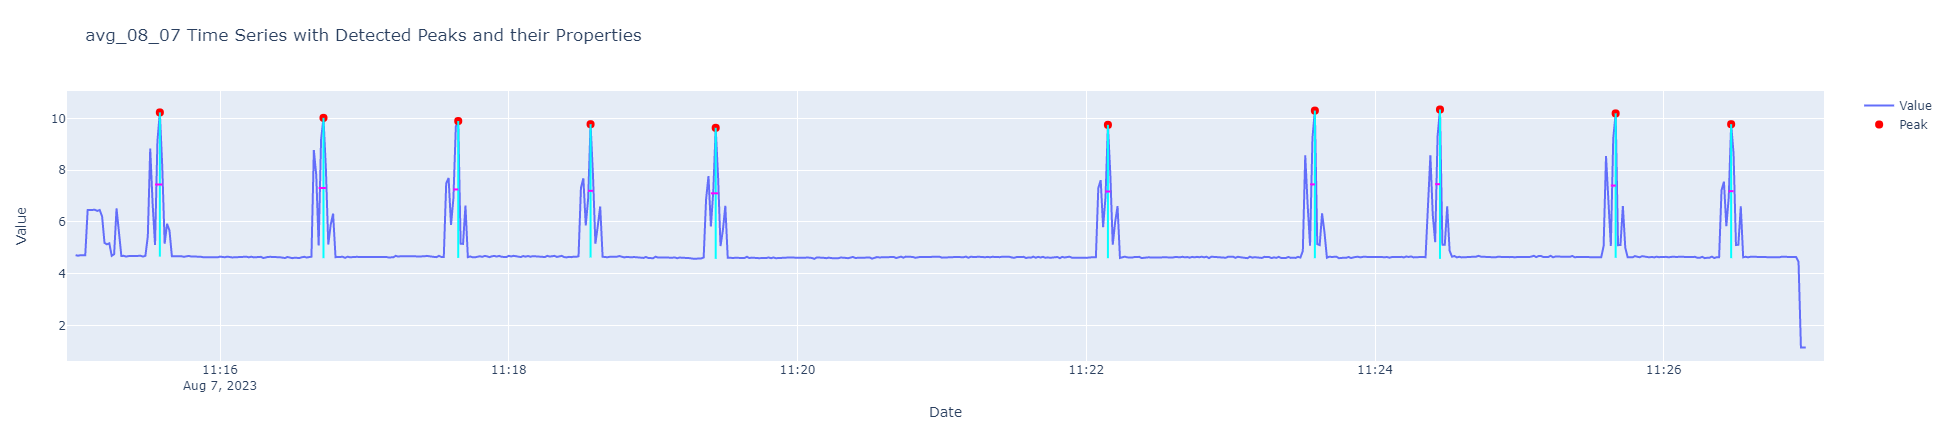

In [ ]:
# Convert the 'Date' column to datetime
avg_08_07['Date'] = pd.to_datetime(avg_08_07['Date'])

# Find peaks with specific prominence and height
peaks_normal, _ = signal.find_peaks(avg_08_07['VALUE'], prominence=4, height=5)

# Get prominences
prominences = signal.peak_prominences(avg_08_07['VALUE'], peaks_normal)[0]

# Get width properties
widths, width_heights, _, _ = signal.peak_widths(avg_08_07['VALUE'], peaks_normal, rel_height=0.5)

# Create a new DataFrame for the peak properties
anomal_peak_df = avg_08_07.iloc[peaks_normal].copy()
anomal_peak_df['Prominence'] = prominences
anomal_peak_df['Width_Height'] = width_heights
anomal_peak_df['Width'] = widths


In [ ]:
# sample은 6월 3일에 대한 EU데이터이다.

In [ ]:
# Convert the 'Date' column to datetime
sample['Date'] = pd.to_datetime(sample['Date'])

# Reset index for the sample DataFrame
sample = sample.reset_index(drop=True)

# Find peaks with specific prominence and height
peaks_normal, _ = signal.find_peaks(sample['VALUE'], prominence=4, height=5)

# Get prominences
prominences = signal.peak_prominences(sample['VALUE'], peaks_normal)[0]

# Get width properties
widths, width_heights, left_ips, right_ips = signal.peak_widths(sample['VALUE'], peaks_normal, rel_height=0.5)

# Visualization using Plotly
fig = go.Figure()

# Plot the actual data
fig.add_trace(go.Scatter(x=sample['Date'], y=sample['VALUE'], mode='lines', name='Value'))

# Highlight the peaks
fig.add_trace(go.Scatter(x=sample['Date'][peaks_normal], y=sample['VALUE'][peaks_normal], mode='markers', marker=dict(size=8, color='red'), name='Peak'))

# Display prominences, widths, and heights
for idx, (peak, prominence, width_height, width) in enumerate(zip(peaks_normal, prominences, width_heights, widths)):
    fig.add_shape(
        type="line", x0=sample['Date'][peak], x1=sample['Date'][peak], y0=sample['VALUE'][peak], y1=sample['VALUE'][peak] - prominence,
        line=dict(color="cyan")
    )
    fig.add_shape(
        type="line", x0=sample['Date'][int(left_ips[idx])], x1=sample['Date'][int(right_ips[idx])], y0=width_height, y1=width_height,
        line=dict(color="magenta")
    )

fig.update_layout(title="06.03 EU Time Series with Detected Peaks and their Properties", xaxis_title="Date", yaxis_title="Value")
fig.show()

In [ ]:
# Convert the 'Date' column to datetime
sample['Date'] = pd.to_datetime(sample['Date'])

# Find peaks with specific prominence and height
peaks_normal, _ = signal.find_peaks(sample['VALUE'], prominence=4, height=5)

# Get prominences
prominences = signal.peak_prominences(sample['VALUE'], peaks_normal)[0]

# Get width properties
widths, width_heights, _, _ = signal.peak_widths(sample['VALUE'], peaks_normal, rel_height=0.5)

# Create a new DataFrame for the peak properties
normal_peak_df = sample.iloc[peaks_normal].copy()
normal_peak_df['Prominence'] = prominences
normal_peak_df['Width_Height'] = width_heights
normal_peak_df['Width'] = widths

In [ ]:
from scipy.stats import ttest_ind, zscore
import numpy as np

# 데이터 추출

normal_Value = normal_peak_df["VALUE"]
normal_Value = anomal_peak_df["VALUE"]

normal_prominence = normal_peak_df["Prominence"]
anomal_prominence = anomal_peak_df["Prominence"]

normal_width_height = normal_peak_df["Width_Height"]
anomal_width_height = anomal_peak_df["Width_Height"]

normal_width = normal_peak_df["Width"]
anomal_width = anomal_peak_df["Width"]

In [ ]:
from scipy.stats import ttest_ind
from statsmodels.stats.weightstats import ztest

# Value에 대한 t-test와 z-test
t_stat_Value, p_val_ttest_Value= ttest_ind(normal_peak_df["VALUE"], anomal_peak_df["VALUE"])
z_stat_Value, p_val_ztest_Value = ztest(normal_peak_df["VALUE"], anomal_peak_df["VALUE"])

# Prominence에 대한 t-test와 z-test
t_stat_prominence, p_val_ttest_prominence = ttest_ind(normal_peak_df["Prominence"], anomal_peak_df["Prominence"])
z_stat_prominence, p_val_ztest_prominence = ztest(normal_peak_df["Prominence"], anomal_peak_df["Prominence"])

# Width_Height에 대한 t-test와 z-test
t_stat_width_height, p_val_ttest_width_height = ttest_ind(normal_peak_df["Width_Height"], anomal_peak_df["Width_Height"])
z_stat_width_height, p_val_ztest_width_height = ztest(normal_peak_df["Width_Height"], anomal_peak_df["Width_Height"])

# Width에 대한 t-test와 z-test
t_stat_width, p_val_ttest_width = ttest_ind(normal_peak_df["Width"], anomal_peak_df["Width"])
z_stat_width, p_val_ztest_width = ztest(normal_peak_df["Width"], anomal_peak_df["Width"])

# 결과 출력
alpha = 0.05

def hypothesis_result(p_val, variable_name, test_type):
    if p_val < alpha:
        return f"{variable_name}에 대한 {test_type} 결과, p-value는 {p_val:.5f}로 귀무 가설을 기각한다. 따라서 두 데이터 프레임 간의 평균에는 유의미한 차이가 있다."
    else:
        return f"{variable_name}에 대한 {test_type} 결과, p-value는 {p_val:.5f}로 귀무 가설을 기각하지 않는다. 따라서 두 데이터 프레임 간의 평균에는 유의미한 차이가 없다."


print(hypothesis_result(p_val_ttest_Value, "Value", "t-test"))
print(hypothesis_result(p_val_ztest_Value, "Value", "z-test"))
print(hypothesis_result(p_val_ttest_prominence, "Prominence", "t-test"))
print(hypothesis_result(p_val_ztest_prominence, "Prominence", "z-test"))
print(hypothesis_result(p_val_ttest_width_height, "Width_Height", "t-test"))
print(hypothesis_result(p_val_ztest_width_height, "Width_Height", "z-test"))
print(hypothesis_result(p_val_ttest_width, "Width", "t-test"))
print(hypothesis_result(p_val_ztest_width, "Width", "z-test"))


In [ ]:
#Value에 대한 t-test 결과, p-value는 0.00832로 귀무 가설을 기각한다. 따라서 두 데이터 프레임 간의 평균에는 유의미한 차이가 있다.
#Value에 대한 z-test 결과, p-value는 0.00813로 귀무 가설을 기각한다. 따라서 두 데이터 프레임 간의 평균에는 유의미한 차이가 있다.
#Prominence에 대한 t-test 결과, p-value는 0.00267로 귀무 가설을 기각한다. 따라서 두 데이터 프레임 간의 평균에는 유의미한 차이가 있다.
#Prominence에 대한 z-test 결과, p-value는 0.00258로 귀무 가설을 기각한다. 따라서 두 데이터 프레임 간의 평균에는 유의미한 차이가 있다.
#Width_Height에 대한 t-test 결과, p-value는 0.61692로 귀무 가설을 기각하지 않는다. 따라서 두 데이터 프레임 간의 평균에는 유의미한 차이가 없다.
#Width_Height에 대한 z-test 결과, p-value는 0.61676로 귀무 가설을 기각하지 않는다. 따라서 두 데이터 프레임 간의 평균에는 유의미한 차이가 없다.
#Width에 대한 t-test 결과, p-value는 0.00807로 귀무 가설을 기각한다. 따라서 두 데이터 프레임 간의 평균에는 유의미한 차이가 있다.
#Width에 대한 z-test 결과, p-value는 0.00788로 귀무 가설을 기각한다. 따라서 두 데이터 프레임 간의 평균에는 유의미한 차이가 있다.

In [ ]:
sample_size = len(anomal_peak_df)

# 샘플링

normal_sample_Value = np.random.choice(normal_peak_df["VALUE"], sample_size, replace=False)
anomal_sample_Value = np.random.choice(anomal_peak_df["VALUE"], sample_size, replace=False)

normal_sample_prominence = np.random.choice(normal_peak_df["Prominence"], sample_size, replace=False)
anomal_sample_prominence = np.random.choice(anomal_peak_df["Prominence"], sample_size, replace=False)

normal_sample_width_height = np.random.choice(normal_peak_df["Width_Height"], sample_size, replace=False)
anomal_sample_width_height = np.random.choice(anomal_peak_df["Width_Height"], sample_size, replace=False)

normal_sample_width = np.random.choice(normal_peak_df["Width"], sample_size, replace=False)
anomal_sample_width = np.random.choice(anomal_peak_df["Width"], sample_size, replace=False)

# 샘플링된 데이터로 t-test와 z-test 수행
t_stat_sample_Value, p_val_ttest_sample_Value = ttest_ind(normal_sample_prominence, anomal_sample_Value)
z_stat_sample_Value, p_val_ztest_sample_Value = ztest(normal_sample_prominence, anomal_sample_Value)

t_stat_sample_prominence, p_val_ttest_sample_prominence = ttest_ind(normal_sample_prominence, anomal_sample_prominence)
z_stat_sample_prominence, p_val_ztest_sample_prominence = ztest(normal_sample_prominence, anomal_sample_prominence)

t_stat_sample_width_height, p_val_ttest_sample_width_height = ttest_ind(normal_sample_width_height, anomal_sample_width_height)
z_stat_sample_width_height, p_val_ztest_sample_width_height = ztest(normal_sample_width_height, anomal_sample_width_height)

t_stat_sample_width, p_val_ttest_sample_width = ttest_ind(normal_sample_width, anomal_sample_width)
z_stat_sample_width, p_val_ztest_sample_width = ztest(normal_sample_width, anomal_sample_width)

# 결과 출력
print(hypothesis_result(p_val_ttest_sample_Value, "Value (Sampled)", "t-test"))
print(hypothesis_result(p_val_ztest_sample_Value, "Value (Sampled)", "z-test"))
print(hypothesis_result(p_val_ttest_sample_prominence, "Prominence (Sampled)", "t-test"))
print(hypothesis_result(p_val_ztest_sample_prominence, "Prominence (Sampled)", "z-test"))
print(hypothesis_result(p_val_ttest_sample_width_height, "Width_Height (Sampled)", "t-test"))
print(hypothesis_result(p_val_ztest_sample_width_height, "Width_Height (Sampled)", "z-test"))
print(hypothesis_result(p_val_ttest_sample_width, "Width (Sampled)", "t-test"))
print(hypothesis_result(p_val_ztest_sample_width, "Width (Sampled)", "z-test"))


In [ ]:
#Value (Sampled)에 대한 t-test 결과, p-value는 0.00000로 귀무 가설을 기각한다. 따라서 두 데이터 프레임 간의 평균에는 유의미한 차이가 있다.
#Value (Sampled)에 대한 z-test 결과, p-value는 0.00000로 귀무 가설을 기각한다. 따라서 두 데이터 프레임 간의 평균에는 유의미한 차이가 있다.
#Prominence (Sampled)에 대한 t-test 결과, p-value는 0.00990로 귀무 가설을 기각한다. 따라서 두 데이터 프레임 간의 평균에는 유의미한 차이가 있다.
#Prominence (Sampled)에 대한 z-test 결과, p-value는 0.00394로 귀무 가설을 기각한다. 따라서 두 데이터 프레임 간의 평균에는 유의미한 차이가 있다.
#Width_Height (Sampled)에 대한 t-test 결과, p-value는 0.37361로 귀무 가설을 기각하지 않는다. 따라서 두 데이터 프레임 간의 평균에는 유의미한 차이가 없다.
#Width_Height (Sampled)에 대한 z-test 결과, p-value는 0.36155로 귀무 가설을 기각하지 않는다. 따라서 두 데이터 프레임 간의 평균에는 유의미한 차이가 없다.
#Width (Sampled)에 대한 t-test 결과, p-value는 0.08450로 귀무 가설을 기각하지 않는다. 따라서 두 데이터 프레임 간의 평균에는 유의미한 차이가 없다.
#Width (Sampled)에 대한 z-test 결과, p-value는 0.06786로 귀무 가설을 기각하지 않는다. 따라서 두 데이터 프레임 간의 평균에는 유의미한 차이가 없다.

In [ ]:
def cohen_d(group1, group2):
    # 각 그룹의 평균 및 표준 편차 계산
    mean1, mean2 = np.mean(group1), np.mean(group2)
    std1, std2 = np.std(group1, ddof=1), np.std(group2, ddof=1)
    n1, n2 = len(group1), len(group2)

    # 통합 표준 편차 계산
    pooled_std = np.sqrt(((n1 - 1) * std1**2 + (n2 - 1) * std2**2) / (n1 + n2 - 2))

    # Cohen's d 계산
    d = (mean1 - mean2) / pooled_std
    return d

# 각 변수에 대해 Cohen's d 계산
d_VALUE = cohen_d(normal_peak_df["VALUE"], anomal_peak_df["VALUE"])
d_prominence = cohen_d(normal_peak_df["Prominence"], anomal_peak_df["Prominence"])
d_width_height = cohen_d(normal_peak_df["Width_Height"], anomal_peak_df["Width_Height"])
d_width = cohen_d(normal_peak_df["Width"], anomal_peak_df["Width"])

# 결과 출력
print(f"VALUE의 Cohen's d: {d_VALUE:.4f}")
print(f"Prominence의 Cohen's d: {d_prominence:.4f}")
print(f"Width_Height의 Cohen's d: {d_width_height:.4f}")
print(f"Width의 Cohen's d: {d_width:.4f}")


In [ ]:
#VALUE의 Cohen's d: 0.8432
#Prominence의 Cohen's d: 0.9603
#Width_Height의 Cohen's d: 0.1594
#Width의 Cohen's d: 0.8465

In [ ]:
import plotly.graph_objects as go

variables = ['VALUE', 'Prominence', 'Width_Height', 'Width']

# 각 변수에 대한 수평 box plot 생성
for var in variables:
    fig = go. Figure()

    # normal_peak_df에 대한 box plot
    fig.add_trace(go.Box(
        x=normal_peak_df[var],
        name=f'Normal {var}',
        marker_color='blue',
        orientation='h'  # 수평 방향 설정
    ))

    # anomal_peak_df에 대한 box plot
    fig.add_trace(go.Box(
        x=anomal_peak_df[var],
        name=f'Anomaly {var}',
        marker_color='red',
        orientation='h'  # 수평 방향 설정
    ))

    # 레이아웃 설정
    fig. update_layout(
        title=f'Normal vs Anomaly Distribution Comparison for {var}',
        xaxis_title='Value'
    )

    fig.show()


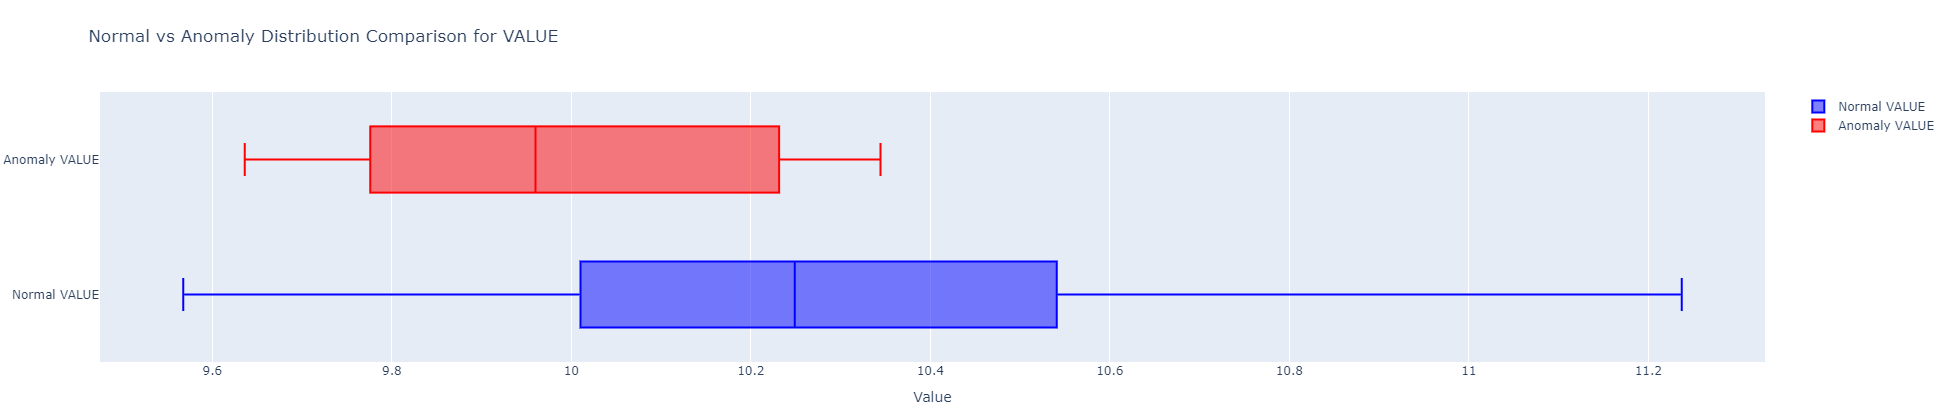

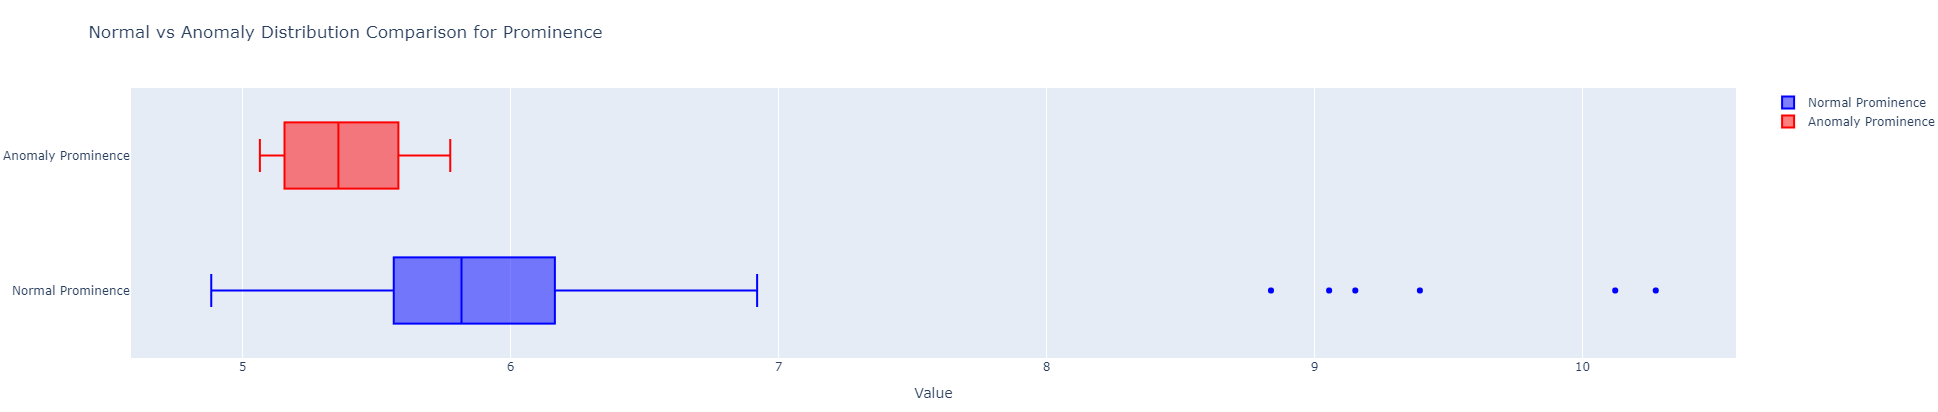

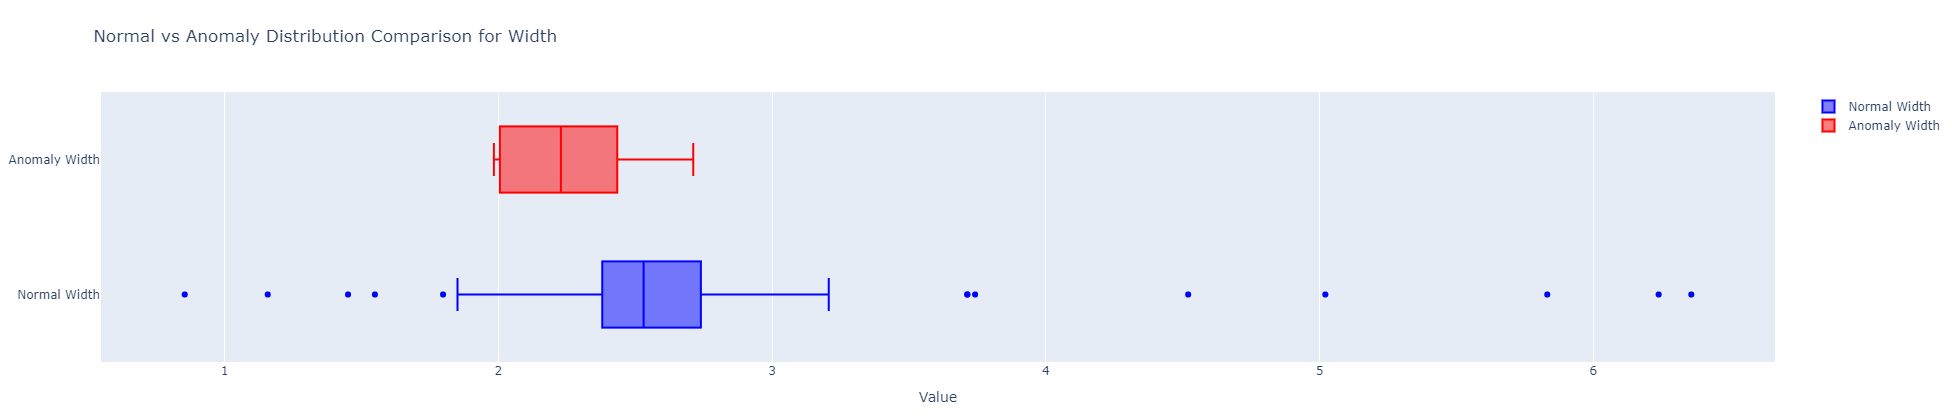

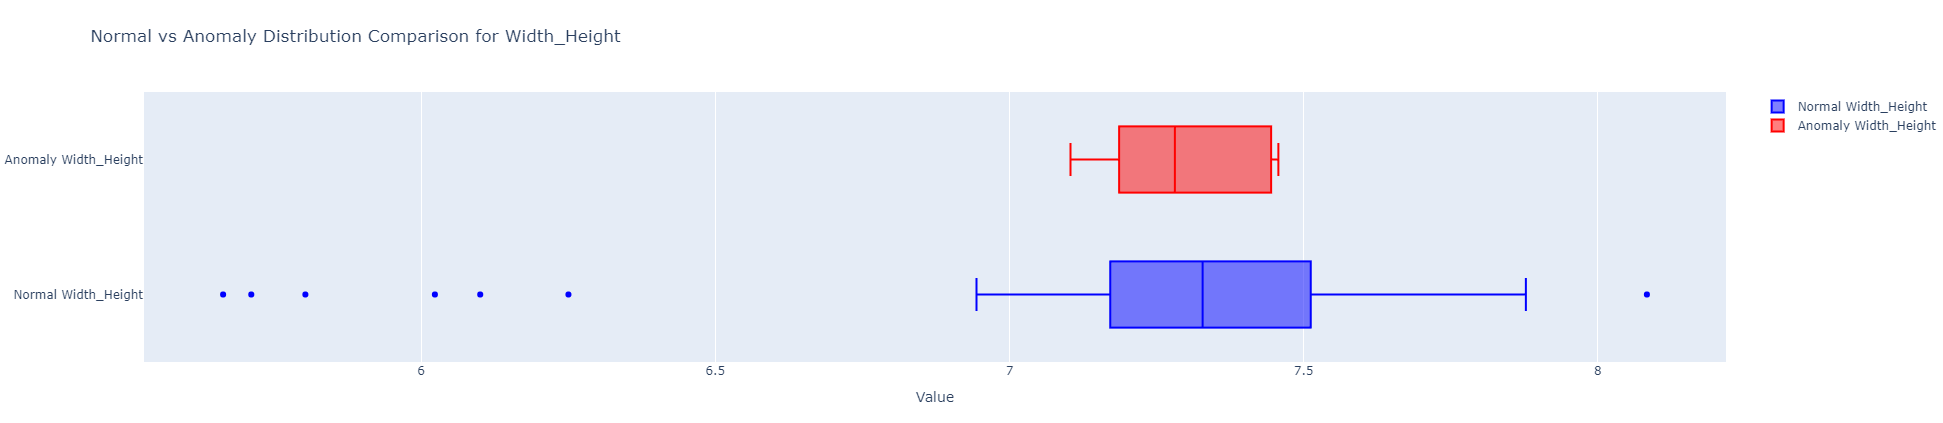

## Pycaret

In [ ]:
pip install pycaret

In [ ]:
import pycaret
from pycaret.anomaly import *
from pycaret.anomaly import AnomalyExperiment
pycaret.__version__

In [ ]:
df = pd.read_csv('C:/Users/Admin/Downloads/Etri/Dishwashers_Anomaly_Detection/dataset.csv')

In [ ]:
Data_05_17_24_strength.drop(['Unnamed: 0'], axis = 1, inplace = True)

In [ ]:
dates = ['2023-05-17', '2023-05-18', '2023-05-19','2023-05-22','2023-05-23','2023-05-24']
         #,'2023-05-25','2023-05-26','2023-05-29','2023-05-30','2023-05-31','2023-06-01','2023-06-02']
selected_dates = pd.to_datetime(dates).date
df['Date'] = pd.to_datetime(df['Date'])

Data_05_17_24_strength = df[df['Date'].dt.date.isin(selected_dates)]

#filtered_data_strength_us = filter_rows_with_values(Data_05_06_strength , 'US')
#filtered_data_strength_eu = filter_rows_with_values(Data_05_06_strength , 'EU')

#strength_us = filtered_data_strength_us[['VALUE','Min_Max_diff']]
#strength_eu = filtered_data_strength_eu[['VALUE','Min_Max_diff']]

In [ ]:
Data_05_17_24 = Data_05_17_24_strength[['Date','VALUE','Category']]

In [ ]:
anom = setup(data = Data_05_17_24, verbose = 0, normalize = True)

In [ ]:
models()

In [ ]:
te_pred = np.zeros(Data_05_17_24.shape[0], )
preds = []
pred=[]

In [ ]:
models()['Name'].index[:-2]

In [ ]:
for name in ['cluster', 'iforest','knn', 'lof', 'svm'] :

    ### 모델 호출
    model = create_model(name)

    ### 모델 학습
    fitting = assign_model(model)

    ### 예측값 생성
    pred = predict_model(model, Data_05_17_24)['Anomaly']
    preds.append(pred.tolist())
    te_pred += pred

In [ ]:
pred = te_pred > 4
Data_05_17_24['LABEL'] = pred

In [ ]:
Data_05_17_24_anomaly_us = Data_05_17_24[(Data_05_17_24['LABEL'] == 1) & (Data_05_17_24['Category'] == 'US') & (Data_05_17_24['VALUE'] >= 5)]
Data_05_17_24_anomaly_eu = Data_05_17_24[(Data_05_17_24['LABEL'] == 1) & (Data_05_17_24['Category'] == 'EU') & (Data_05_17_24['VALUE'] >= 5)]

In [ ]:
anomaly_indices = Data_05_17_24_anomaly_eu.index
corresponding_rows = Data_05_17_24_strength.loc[anomaly_indices]

In [ ]:
# plot value on y-axis and date on x-axis
fig = px.line(Data_05_17_24, x=Data_05_17_24.index, y="VALUE", title='UNSUPERVISED ANOMALY DETECTION', template = 'plotly_dark')
# create list of outlier_dates
outlier_dates = Data_05_17_24[Data_05_17_24['LABEL'] == 1].index
# obtain y value of anomalies to plot
y_values = [Data_05_17_24.loc[i]['VALUE'] for i in outlier_dates]
fig.add_trace(go.Scatter(x=outlier_dates, y=y_values, mode = 'markers',
                name = 'Anomaly',
                marker=dict(color='red',size=10)))

fig.show()

In [ ]:
Data_05_17_24_anomaly_us_graph_indices = []

for index, row in Data_05_17_24_anomaly_us.iterrows():
    start_index, end_index = each_visualize_comparison(Current_Strength_US_EU_data, index, 5)
    Data_05_17_24_anomaly_us_graph_indices.append((start_index, end_index))

In [ ]:
# US 그래프 그리기
plot_dtw_comparison(Current_Strength_US_EU_data, Data_05_17_24_anomaly_us_graph_indices, 'US DTW Comparison of Selected Graphs')

## DTW 유사도로 판단

In [ ]:
import numpy as np
import pandas as pd
from scipy.signal import find_peaks
from tslearn.metrics import dtw
from tslearn.preprocessing import TimeSeriesScalerMeanVariance
from fastdtw import fastdtw
from scipy.spatial.distance import euclidean

# Extract the 'VALUE' series from the DataFrame
data = Data_05_17_19_strength_EU['VALUE'].values

# Detect peaks
peaks, _ = find_peaks(data, prominence=5, width=2, height=10)

# Define a window size to capture the cycle (10 seconds before and after peak)
window_size = 10

# Segment the time series data into individual cycles and record corresponding dates
cycles = []
cycle_dates = []
for peak in peaks:
    start_index = max(0, peak - window_size)
    end_index = min(len(data), peak + window_size)
    cycles.append(data[start_index : end_index])
    cycle_dates.append(Data_05_17_19_strength_EU.iloc[start_index]['날짜'])  # replace 'Date' with your date column name

# Standardize the cycles using tslearn's TimeSeriesScalerMeanVariance
scaler = TimeSeriesScalerMeanVariance(mu=0., std=1.)  # Rescale time series
scaled_cycles = [scaler.fit_transform(cycle.reshape(-1, 1)) for cycle in cycles]

# Calculate DTW distance between all pairs of cycles
n_cycles = len(scaled_cycles)
dist_matrix = np.empty((n_cycles, n_cycles))
for i in range(n_cycles):
    for j in range(n_cycles):
        # Ensure the 2D cycle data is reduced to 1D before running DTW
        cycle_i = np.mean(scaled_cycles[i], axis=1)
        cycle_j = np.mean(scaled_cycles[j], axis=1)
        distance, path = fastdtw(cycle_i, cycle_j, dist=euclidean)
        dist_matrix[i, j] = distance

# Detect outliers based on DTW distance
# A simple method would be to consider cycles with a mean DTW distance larger than the average as outliers
mean_dtw_distances = dist_matrix.mean(axis=1)
threshold = mean_dtw_distances.mean()
outlier_indices = np.where(mean_dtw_distances > threshold)[0]

print(f"Outlier cycles at indices: {outlier_indices}")
for index in outlier_indices:
    print(f"Outlier detected on date: {cycle_dates[index]}")


## SR 변환 적용

In [ ]:
Current_Strength_US = Current_Strength_US_EU_data[Current_Strength_US_EU_data['Category'] == 'US']['VALUE']
Current_Strength_EU = Current_Strength_US_EU_data[Current_Strength_US_EU_data['Category'] == 'EU']['VALUE']

In [ ]:
def series_filter(values, kernel_size=3):

    filter_values = np.cumsum(values, dtype=float)

    filter_values[kernel_size:] = filter_values[kernel_size:] - filter_values[:-kernel_size]
    filter_values[kernel_size:] = filter_values[kernel_size:] / kernel_size

    for i in range(1, kernel_size):
        filter_values[i] /= i + 1

    return filter_values


def extrapolate_next(values):


    last_value = values[-1]
    slope = [(last_value - v) / i for (i, v) in enumerate(values[::-1])]
    slope[0] = 0
    next_values = last_value + np.cumsum(slope)

    return next_values


def marge_series(values, extend_num=5, forward=5):

    next_value = extrapolate_next(values)[forward]
    extension = [next_value] * extend_num

    if isinstance(values, list):
        marge_values = values + extension
    else:
        marge_values = np.append(values, extension)
    return marge_values



class Silency(object):
    def __init__(self, amp_window_size, series_window_size, score_window_size):
        self.amp_window_size = amp_window_size
        self.series_window_size = series_window_size
        self.score_window_size = score_window_size

    def transform_silency_map(self, values):


        freq = np.fft.fft(values)
        mag = np.sqrt(freq.real ** 2 + freq.imag ** 2)
        spectral_residual = np.exp(np.log(mag) - series_filter(np.log(mag), self.amp_window_size))

        freq.real = freq.real * spectral_residual / mag
        freq.imag = freq.imag * spectral_residual / mag

        silency_map = np.fft.ifft(freq)
        return silency_map

    def transform_spectral_residual(self, values):
        silency_map = self.transform_silency_map(values)
        spectral_residual = np.sqrt(silency_map.real ** 2 + silency_map.imag ** 2)
        return spectral_residual

    def generate_anomaly_score(self, values, type="avg"):


        extended_series = marge_series(values, self.series_window_size, self.series_window_size)
        mag = self.transform_spectral_residual(extended_series)[: len(values)]

        if type == "avg":
            ave_filter = series_filter(mag, self.score_window_size)
            score = (mag - ave_filter) / ave_filter
        elif type == "abs":
            ave_filter = series_filter(mag, self.score_window_size)
            score = np.abs(mag - ave_filter) / ave_filter
        elif type == "chisq":
            score = stats.chi2.cdf((mag - np.mean(mag)) ** 2 / np.var(mag), df=1)
        else:
            raise ValueError("No type!")
        return score

In [ ]:
def sr_time_series(time_series, amp_window_size=30, series_window_size=30, score_window_size=3):
    # Initialize the Silency class with given window sizes
    silency_transformer = Silency(amp_window_size, series_window_size, score_window_size)

    #amp_window_size: 스펙트럼 구성 요소의 진폭을 평활화하거나 필터링하는 데 사용되는 창 크기. 이 값을 증가시키면 진폭의 평활화가 더욱 강조되어 스펙트럼에서의 급격한 변동을 줄일 수 있습니다.
    #series_window_size: 시계열 데이터를 직접 작업할 때 사용되는 창 크기(예: 시계열 병합 또는 세분화)를 제어할 수 있습니다. 정확한 목적은 시계열에 적용되는 특정 방법이나 알고리즘에 따라 달라집니다.
    #SCORE_WINDOW_SIZE: 이는 스펙트럼 잔차의 최종 점수 또는 순위와 관련이 있을 수 있으며, 잔차가 최종 이상치 점수로 변환되는 방식을 제어합니다. 다시 말하지만, 이동 평균 또는 기타 평활화 기법에서 최종 측정값을 도출하는 데 사용될 수 있습니다.

    # Transform the time series to spectral residuals
    spectral_residuals = silency_transformer.transform_spectral_residual(time_series)

    # Return the spectral residuals
    return spectral_residuals


In [ ]:
# Assuming Current_Strength_EU is available, split it into training and testing data
length = len(Current_Strength_EU)
split_point = int(length * 0.7)

EU_data = Current_Strength_EU[:split_point]
real = Current_Strength_EU[split_point:]

In [ ]:
# FFT Transformation
fft_EU = np.fft.fft(EU_data)
fft_real = np.fft.fft(real)

fft_EU_magnitude = [abs(value) for value in fft_EU]
fft_EU_phase = [np.angle(value) for value in fft_EU]

In [ ]:
# Conversion to SR format
SR_EU = sr_time_series(EU_data)
SR_real = sr_time_series(real)

In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np




fig = make_subplots(rows=3, cols=1, shared_xaxes=True, subplot_titles=("EU_data", "SR_EU", "fft_EU Magnitude"))

# Add EU_data to the first subplot
fig.add_trace(
    go.Scatter(y=EU_data, mode='lines', name='EU_data'),
    row=1, col=1
)

# Add SR_EU data to the second subplot
fig.add_trace(
    go.Scatter(y=SR_EU, mode='lines', name='SR_EU'),
    row=2, col=1
)

# Add fft_EU Magnitude (in log scale) to the third subplot
fig.add_trace(
    go.Scatter(y=np.log(np.abs(fft_EU) + 1e-10), mode='lines', name='fft_EU Magnitude (Log Scale)'),
    row=3, col=1
)

# Update xaxis and yaxis properties
fig.update_xaxes(title_text="Time", row=1, col=1)
fig.update_yaxes(title_text="EU_data Value", row=1, col=1)
fig.update_xaxes(title_text="Time", row=2, col=1)
fig.update_yaxes(title_text="SR_EU Value", row=2, col=1)
fig.update_xaxes(title_text="Time", row=3, col=1)
fig.update_yaxes(title_text="fft_EU Magnitude (Log Scale)", row=3, col=1)

# Update title and show figure
fig.update_layout(title_text="EU_data, SR_EU, and fft_EU Magnitude Time Series")
fig.show()


## DIF Anomaly Detection 적용

In [ ]:
# Anomaly Detection Model
from algorithms.dif import DIF

In [ ]:
SR_EU = SR_EU.reshape(-1, 1)

In [ ]:
model_configs = {
    'n_ensemble': 100,
    'n_estimators': 8,
    'max_samples': 'auto',
    'batch_size': 1024,
    'n_processes': 4
}
model_dif = DIF(**model_configs)
model_dif.fit(SR_EU)

In [ ]:
real = real.values.reshape(-1, 1)

In [ ]:
DIF_score = model_dif.decision_function(real)

## CNN을 적용한 모델

In [ ]:
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, BatchNormalization

# Reshape input for CNN
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Build the model
model = Sequential()

# First Convolutional Layer
model.add(Conv1D(64, 3, activation='relu', input_shape=(window_size, 1)))
model.add(BatchNormalization())
model.add(MaxPooling1D(2))
model.add(Dropout(0.2))

# Fully Connected Layer
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.5))

# Output Layer
model.add(Dense(prediction_step))

model.compile(optimizer='adam', loss='mse')

# Train the model
model.fit(X_train, y_train, epochs=3, batch_size=64, verbose=1, validation_split=0.1)

## 데이터 관찰 코드

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Prepare sequences for LSTM with 1-dimensional data
def create_dataset(dataset, look_back=60):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back)]
        dataX.append(a)
        dataY.append(dataset[i + look_back])
    return np.array(dataX), np.array(dataY)


def preprocess_and_train(dataset, window_size):
    category = dataset['Category'].iloc[0]
    data_subset = dataset[dataset['Category'] == category]['VALUE'].values
    SR_data = sr_time_series(data_subset)

    X, y = create_dataset(SR_data, window_size)
    X = X.reshape(X.shape[0], window_size, 1)

    lstm_model = create_lstm_model(window_size)
    lstm_model.fit(X, y, epochs=5, batch_size=64)

    SR_data_dif = SR_data.reshape(-1, 1)
    model_configs = {
        'n_ensemble': 100,
        'n_estimators': 8,
        'max_samples': 'auto',
        'batch_size': 1024,
        'n_processes': 4
    }
    model_dif = DIF(**model_configs)
    model_dif.fit(SR_data_dif)

    return lstm_model, model_dif

# Define LSTM model
def create_lstm_model(look_back):
    model = Sequential()
    model.add(LSTM(50, input_shape=(look_back, 1)))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    return model


def visualize_results(real, all_predictions, all_anomaly_scores, all_errors):
    # Visualize original and transformed data, predicted values, anomaly scores, and errors

    transformed_real = sr_time_series(np.array(real))

    fig = make_subplots(rows=4, cols=1, shared_xaxes=True, vertical_spacing=0.1)

    # Replace 'real_data' with 'real' here
    fig.add_trace(go.Scatter(y=real, mode='lines+markers', name='Original Data'), row=1, col=1)
    fig.add_trace(go.Scatter(y=transformed_real, mode='lines+markers', name='Transformed Data'), row=2, col=1)
    fig.add_trace(go.Scatter(x=list(range(window_size, len(all_predictions)+window_size)), y=all_predictions, mode='lines+markers', name='Predictions'), row=2, col=1)
    fig.add_trace(go.Scatter(x=list(range(window_size, len(all_errors)+window_size)), y=all_errors, mode='lines+markers', name='Error'), row=3, col=1)
    fig.add_trace(go.Scatter(x=list(range(window_size, len(all_anomaly_scores)+window_size)), y=all_anomaly_scores, mode='lines+markers', name='Anomaly Score'), row=4, col=1)


    fig.update_layout(height=1000, title_text="Original Data, Transformed Data, Predicted Values, Anomaly Score and Error")
    fig.show()

def real_time_visualization(real_data, model):
    real_data = np.array(real_data)  # Convert series to numpy array
    sr_data = sr_time_series(real_data)
    all_windows = []
    all_predictions = []
    all_anomaly_scores = []
    all_errors = []
    prediction_buffer = []
    buffer_size = 20

    for i in range(len(real_data) - window_size):
        # 1. Get current window and prediction

        current_window = sr_data[i:i+window_size].reshape(1, window_size, 1)
        prediction = model.predict(current_window)
        error = abs(prediction[0, 0] - sr_data[i+window_size])

        # Buffer predictions
        prediction_buffer.append(prediction[0, 0])

        # 2. Append to lists
        all_windows.append(current_window)
        all_predictions.append(prediction[0, 0])
        all_errors.append(error)

        # If we have 20 predictions buffered, compute anomaly scores and clear the buffer
        if len(prediction_buffer) == buffer_size:
            buffered_anomalies = model_dif.decision_function(np.array(prediction_buffer).reshape(-1, 1))
            all_anomaly_scores.extend(buffered_anomalies)
            prediction_buffer.clear()

        # 3. Visualize results in real-time
        clear_output(wait=True)  # Clear previous plots
        visualize_results(real_data[:i+window_size+1], all_predictions, all_anomaly_scores, all_errors)
        time.sleep(0.5)  # Sleep for a duration before the next iteration to make visualization perceptible

    # Calculate anomalies for any remaining buffered predictions
    if prediction_buffer:
        buffered_anomalies = model_dif.decision_function(np.array(prediction_buffer).reshape(-1, 1))
        all_anomaly_scores.extend(buffered_anomalies)

    return all_windows, all_predictions, all_anomaly_scores, all_errors


def run_visualization(real_data, dataset, window_size, buffer_size):
    global fig
    fig = make_subplots(rows=8, cols=1)
    unique_categories = real_data['Category'].unique()

    print(f"Unique Categories Found: {unique_categories}")  # Diagnostic print

    results = {}
    for category in unique_categories:
        print(f"Processing data for: {category}")  # Diagnostic print

        data_subset = real_data[real_data['Category'] == category]
        processed_dataset = dataset[dataset['Category'] == category]

        print(f"Entries for {category}: {len(data_subset)}")  # Diagnostic print

        lstm_model, model_dif = preprocess_and_train(processed_dataset, window_size)
        windows, predictions, anomaly_scores, errors = real_time_visualization(data_subset, lstm_model, model_dif, window_size, buffer_size)

        results[category] = {
            'windows': windows,
            'predictions': predictions,
            'anomaly_scores': anomaly_scores,
            'errors': errors
        }
    return results

In [ ]:
# Transform data
SR_EU = sr_time_series(EU_data)

In [ ]:
# Create sequences for training
window_size = 60
look_back = 60
X, y = create_dataset(SR_EU, look_back)

# Reshape to [samples, timesteps, features]
X = np.reshape(X, (X.shape[0], look_back, 1))

# Train LSTM model
model = create_lstm_model(look_back)
model.fit(X, y, epochs=5, batch_size=64)

In [ ]:
# Run real-time visualization

data = real[:140]
windows, predictions, anomaly_scores, errors = real_time_visualization(data, model)

In [ ]:
# Visualize results
visualize_results(real[:140], windows, predictions, anomaly_scores, errors)

In [ ]:
# Your setup code
dataset = Current_Strength_US_EU_data[:1975000]
real_time_data = Current_Strength_US_EU_data[1975500:1976000]
window_size = 60
buffer_size = 500

results = run_visualization(real_time_data, dataset, window_size, buffer_size)

## Peak 분석 코드

In [ ]:
# Import the libraries
import plotly.express as px
import plotly.graph_objects as go

# Create a figure using plotly express
fig = px.line(avg_08_07, x="Date", y="VALUE", title="Wave Visualization")

# Loop through the wave_dict dictionary
for key, wave_df in wave_dict.items():
    # Get the peak value and date from the wave dataframe
    peak_value = wave_df["VALUE"].max()
    peak_date = wave_df["Date"][wave_df["VALUE"] == peak_value].iloc[0]
    # Add a vertical dashed line at the peak date using plotly graph objects
    fig.add_trace(go.Scatter(x=[peak_date, peak_date], y=[0, peak_value], mode="lines", line=dict(dash="dash"), name=key))
    # Get the start and end value and date from the wave dataframe
    start_value = wave_df["VALUE"].iloc[0]
    start_date = wave_df["Date"].iloc[0]
    end_value = wave_df["VALUE"].iloc[-1]
    end_date = wave_df["Date"].iloc[-1]
    # Add a horizontal dashed line at the start and end value using plotly graph objects
    fig.add_trace(go.Scatter(x=[start_date, end_date], y=[start_value, start_value], mode="lines", line=dict(dash="dash"), name=key + "_start"))
    fig.add_trace(go.Scatter(x=[start_date, end_date], y=[end_value, end_value], mode="lines", line=dict(dash="dash"), name=key + "_end"))

# Show the figure
fig.show()


## anomal 데이터 삽입

In [ ]:
import pandas as pd
import random

# Assuming wave_dict and wave_dict_sample are defined as in your previous examples...

# Extract all the dataframes from wave_dict_sample and wave_dict
sample_frames = [wave_dict_sample[key] for key in sorted(wave_dict_sample.keys())]
anomaly_frames = [wave_dict[key] for key in sorted(wave_dict.keys())]

# Set the anomaly column
for frame in sample_frames:
    frame['anomaly'] = 0

for frame in anomaly_frames:
    frame['anomaly'] = 1

# Get a list of all possible insertion points for anomaly data in the sample dataframe
insertion_points = [i for i in range(1, len(sample_frames))]

# Randomly select from these positions for each anomaly dataframe
random_insertion_points = random.sample(insertion_points, len(anomaly_frames))

# Sort the selected positions to maintain time order
random_insertion_points.sort()

# Weave together the anomaly data and the sample data at the selected positions
combined_frames = []
for i in range(len(sample_frames)):
    combined_frames.append(sample_frames[i])
    if i in random_insertion_points:
        combined_frames.append(anomaly_frames.pop(0))

# If there's any anomaly data left, add it to the end
if anomaly_frames:
    combined_frames.extend(anomaly_frames)

# Concatenate all the frames to create the result dataframe
result_df = pd.concat(combined_frames, ignore_index=True)

print(result_df)


In [ ]:
test = result_df[['VALUE', 'anomaly']]

In [ ]:
import plotly.graph_objects as go

# Extract the data from the DataFrame
values = test['VALUE'].tolist()
anomaly = test['anomaly'].tolist()

# Create the main line plot
fig = go.Figure()
fig.add_trace(go.Scatter(y=values, mode='lines', name='VALUE'))

# Find the starts and ends of the anomaly sections
anomaly_starts = [index for index, value in enumerate(anomaly) if value == 1 and (index == 0 or anomaly[index - 1] == 0)]
anomaly_ends = [index for index, value in enumerate(anomaly) if value == 1 and (index == len(anomaly) - 1 or anomaly[index + 1] == 0)]

# Add shaded regions for anomalies
for (start, end) in zip(anomaly_starts, anomaly_ends):
    fig.add_shape(
        go.layout.Shape(
            type="rect",
            xref="x",
            yref="paper",
            x0=start,
            y0=0,
            x1=end,
            y1=1,
            fillcolor="gray",
            opacity=0.8,
            layer="below",
            line_width=0
        )
    )

# Provide layout details
fig.update_layout(title="VALUE with Anomalies highlighted")
fig.show()


## LSTM AE를 통합 구체적인 수치 설정


In [ ]:
new = pd.read_csv('C:/Users/Admin/Downloads/Etri/Dishwashers_Anomaly_Detection/test.csv')

In [ ]:
df = new.copy()

In [ ]:
# Drop the 'anomaly' column to get the values
input_x = df['VALUE'].values.reshape(-1, 1)
input_y = df['anomaly'].values

In [ ]:
def temporalize(X, y, timesteps):
    output_X = []
    output_y = []

    for i in range(len(X) - timesteps):
        t = X[i:i+timesteps]
        output_X.append(t)
        output_y.append(y[i + timesteps])

    return np.array(output_X), np.array(output_y)

In [ ]:
timesteps = 30
x, y = temporalize(input_x, input_y, timesteps)
print(x.shape)

In [ ]:
# Split into train, valid, and test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=0.2)

print(len(x_train))
print(len(x_valid))
print(len(x_test))

In [ ]:
#LSTM Autoencoder 학습 시에는 Normal(0) 데이터만으로 학습할 것이기 때문에 데이터로 부터 normal(0)과 abnormal(1) 데이터를 분리한다.


# For training the autoencoder, split 0 / 1
x_train_y0 = x_train[y_train == 0]
x_train_y1 = x_train[y_train == 1]

x_valid_y0 = x_valid[y_valid == 0]
x_valid_y1 = x_valid[y_valid == 1]

In [ ]:
epochs = 20
batch = 128
lr = 0.001

# Encoder
lstm_ae.add(layers.LSTM(32, input_shape=(timesteps, n_features), return_sequences=True))
lstm_ae.add(layers.LSTM(16, return_sequences=False))
lstm_ae.add(layers.RepeatVector(timesteps))
# Decoder
lstm_ae.add(layers.LSTM(16, return_sequences=True))
lstm_ae.add(layers.LSTM(32, return_sequences=True))
lstm_ae.add(layers.TimeDistributed(layers.Dense(n_features)))

lstm_ae.summary()

In [ ]:
# compile
lstm_ae.compile(loss='mse', optimizer=optimizers.Adam(lr))

# fit
history = lstm_ae.fit(x_train_y0, x_train_y0,
                     epochs=epochs, batch_size=batch,
                     validation_data=(x_valid_y0, x_valid_y0))

In [ ]:
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='valid loss')
plt.legend()
plt.xlabel('Epoch'); plt.ylabel('loss')
plt.show()

In [ ]:
def flatten(data):
    return data.reshape((data.shape[0], -1))

In [ ]:
valid_x_predictions = lstm_ae.predict(x_valid)
mse = np.mean(np.power(flatten(x_valid) - flatten(valid_x_predictions), 2), axis=1)

error_df = pd.DataFrame({'Reconstruction_error':mse,
                         'True_class':list(y_valid)})
precision_rt, recall_rt, threshold_rt = metrics.precision_recall_curve(error_df['True_class'], error_df['Reconstruction_error'])

plt.figure(figsize=(8,5))
plt.plot(threshold_rt, precision_rt[1:], label='Precision')
plt.plot(threshold_rt, recall_rt[1:], label='Recall')
plt.xlabel('Threshold'); plt.ylabel('Precision/Recall')
plt.legend()
plt.show()

In [ ]:
#Recall과 Precision의 값이 교차되는 지점을 최적의 threshold 지점
# best position of threshold
index_cnt = [cnt for cnt, (p, r) in enumerate(zip(precision_rt, recall_rt)) if p==r][0]
print('precision: ',precision_rt[index_cnt],', recall: ',recall_rt[index_cnt])

# fixed Threshold
threshold_fixed = threshold_rt[index_cnt]
print('threshold: ',threshold_fixed)

In [ ]:
test_x_predictions = lstm_ae.predict(x_test)
mse = np.mean(np.power(flatten(x_test) - flatten(test_x_predictions), 2), axis=1)

error_df = pd.DataFrame({'Reconstruction_error': mse,
                         'True_class': y_test.tolist()})


In [ ]:
import plotly.graph_objects as go

# Generate data for plotting
groups = error_df.groupby('True_class')
normal_data = groups.get_group(0)
break_data = groups.get_group(1)

# Create the scatter plots
trace_normal = go.Scatter(
    x=normal_data.index,
    y=normal_data.Reconstruction_error,
    mode='markers',
    name='Normal',
    marker=dict(size=3.5, color='blue')
)

trace_break = go.Scatter(
    x=break_data.index,
    y=break_data.Reconstruction_error,
    mode='markers',
    name='Abnormal',
    marker=dict(size=3.5, color='orange')
)

trace_threshold = go.Scatter(
    x=[error_df.index.min(), error_df.index.max()],
    y=[threshold_fixed, threshold_fixed],
    mode='lines',
    name='Threshold',
    line=dict(color='red')
)

# Layout
layout = go.Layout(
    title='Reconstruction error for different classes',
    xaxis=dict(title='Data point index'),
    yaxis=dict(title='Reconstruction error'),
    legend=dict(y=1, x=1)
)

fig = go.Figure(data=[trace_normal, trace_break, trace_threshold], layout=layout)
fig.show()

In [ ]:
#테스트 셋에 대한 재구성 손실을 threshold를 기준으로 0/1로 나누고 이를 confusion matrix로 표현하였다.

In [ ]:
# classification by threshold
pred_y = [1 if e > threshold_fixed else 0 for e in error_df['Reconstruction_error'].values]

conf_matrix = metrics.confusion_matrix(error_df['True_class'], pred_y)
plt.figure(figsize=(7, 7))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Class'); plt.ylabel('True Class')
plt.show()

In [ ]:
false_pos_rate, true_pos_rate, thresholds = metrics.roc_curve(error_df['True_class'], error_df['Reconstruction_error'])
roc_auc = metrics.auc(false_pos_rate, true_pos_rate,)

plt.plot(false_pos_rate, true_pos_rate, linewidth=5, label='AUC = %0.3f'% roc_auc)
plt.plot([0,1],[0,1], linewidth=5)

plt.xlim([-0.01, 1])
plt.ylim([0, 1.01])
plt.legend(loc='lower right')
plt.title('Receiver operating characteristic curve (ROC)')
plt.ylabel('True Positive Rate'); plt.xlabel('False Positive Rate')
plt.show()